In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_06_0000.csv'

In [10]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [11]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period      s1a     s1x     s1i  \
datetime                                                                     
2013-03-06 00:10:00  2013-03-06  00:10:00     600  0.31280  0.4505  0.2210   
2013-03-06 00:20:00  2013-03-06  00:20:00     600  0.22100  0.2669  0.2210   
2013-03-06 00:30:00  2013-03-06  00:30:00     600  0.26231  0.4505  0.2210   
2013-03-06 00:40:00  2013-03-06  00:40:00     600  0.69836  1.0931  0.4046   
2013-03-06 00:50:00  2013-03-06  00:50:00     600  1.04720  1.2308  0.8636   

                         s1s      s2a     s2x     s2i  ...  tii  vxa  vxx  \
datetime                                               ...                  
2013-03-06 00:10:00  0.05967  0.32098  0.4954  0.2200  ...   32  124  124   
2013-03-06 00:20:00  0.00459  0.22000  0.2659  0.2200  ...   32  124  124   
2013-03-06 00:30:00  0.07344  0.22000  0.2659  0.2200  ...   32  124  124   
2013-03-06 00:40:00  0.16524  0.70195  1.1380  0.3118  ...   32  124  124   
2013-03-06 00:50:00  0.11475  1.06456  1.2757  0.9085  ...   32  124  124   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-06 00:10:00  124   83   83   83   83   83   83  
2013-03-06 00:20:00  124   83   83   83   83   83   83  
2013-03-06 00:30:00  124   83   83   83   83   83   83  
2013-03-06 00:40:00  124   83   83   83   83   83   83  
2013-03-06 00:50:00  124   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       8.045548
std        3.278277
min        0.221000
25%        5.816210
50%        7.884005
75%       11.357487
max       12.958250
Name: s1a, dtype: float64


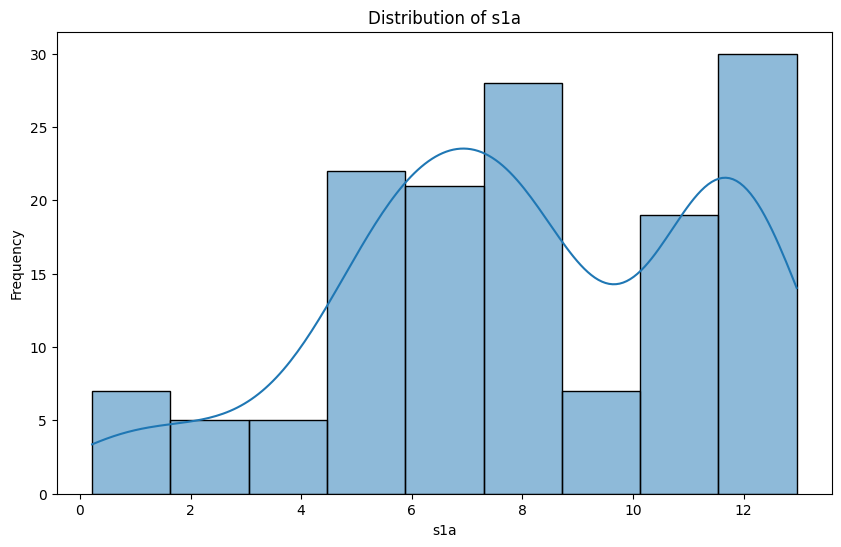


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       9.253419
std        3.519532
min        0.266900
25%        6.692900
50%        9.951800
75%       12.063200
max       15.276200
Name: s1x, dtype: float64


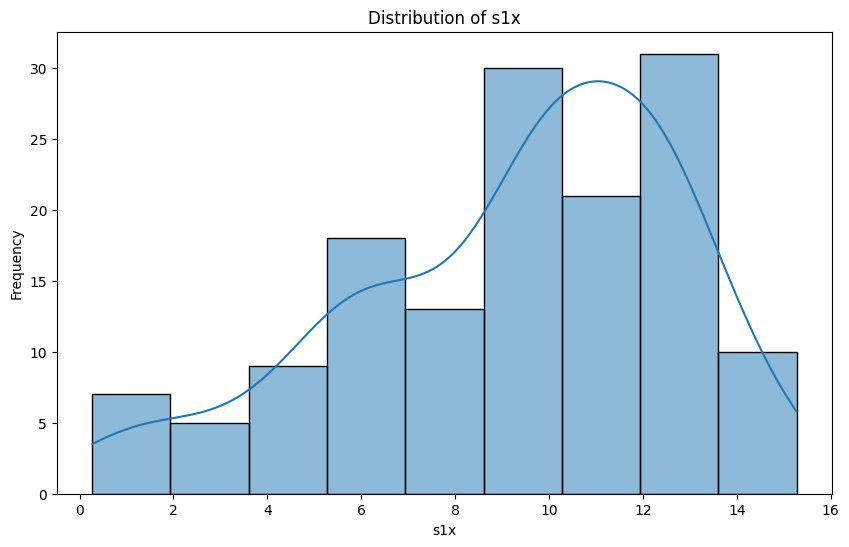


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       6.744856
std        3.162136
min        0.221000
25%        4.673300
50%        5.499500
75%       10.376375
max       11.833700
Name: s1i, dtype: float64


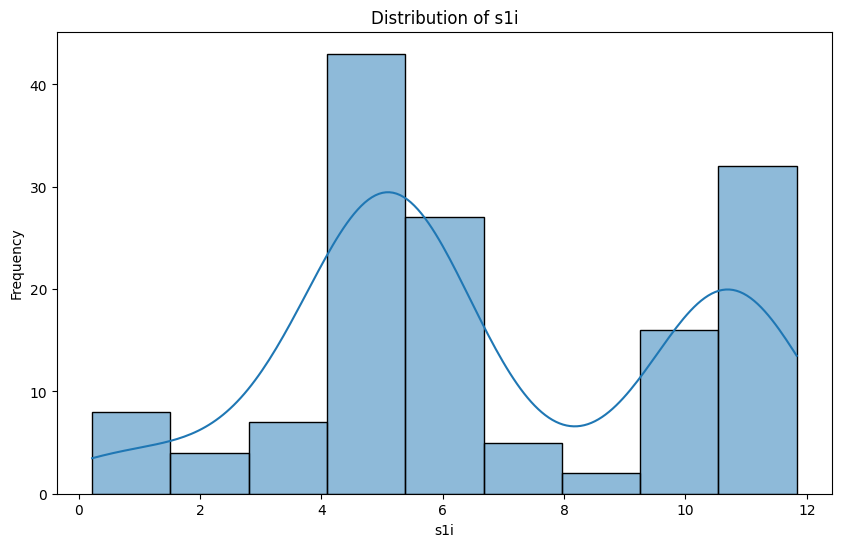


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.443509
std        0.284145
min        0.004590
25%        0.165240
50%        0.426870
75%        0.682763
max        1.142910
Name: s1s, dtype: float64


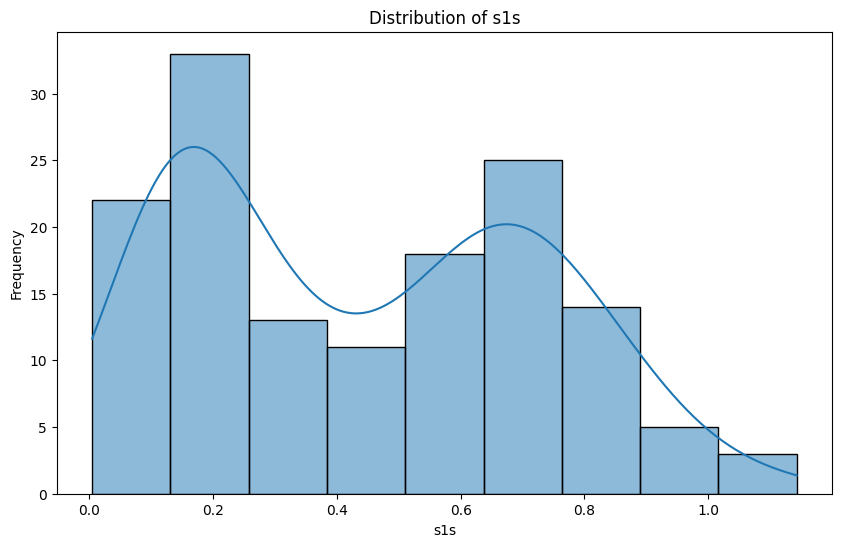


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       7.974709
std        3.234983
min        0.220000
25%        5.749802
50%        7.848580
75%       11.247475
max       12.819550
Name: s2a, dtype: float64


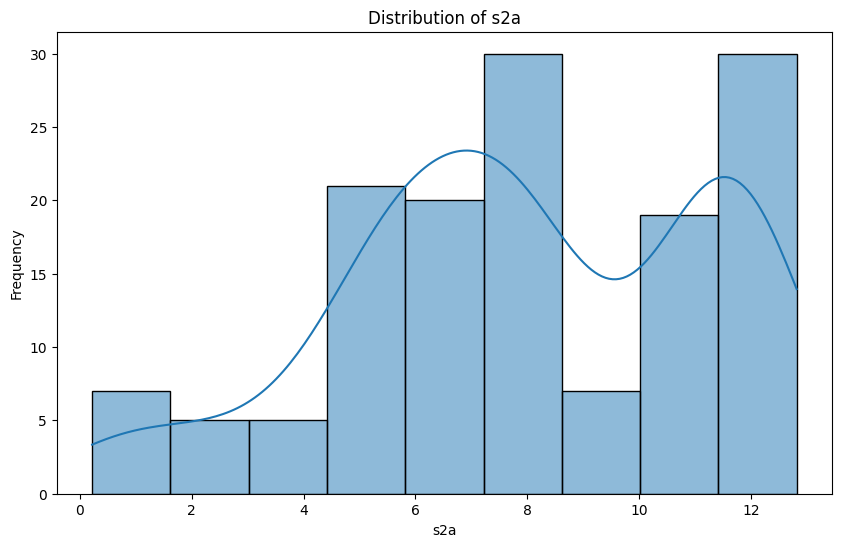


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       9.171137
std        3.487864
min        0.265900
25%        6.646000
50%        9.904900
75%       11.844175
max       15.183400
Name: s2x, dtype: float64


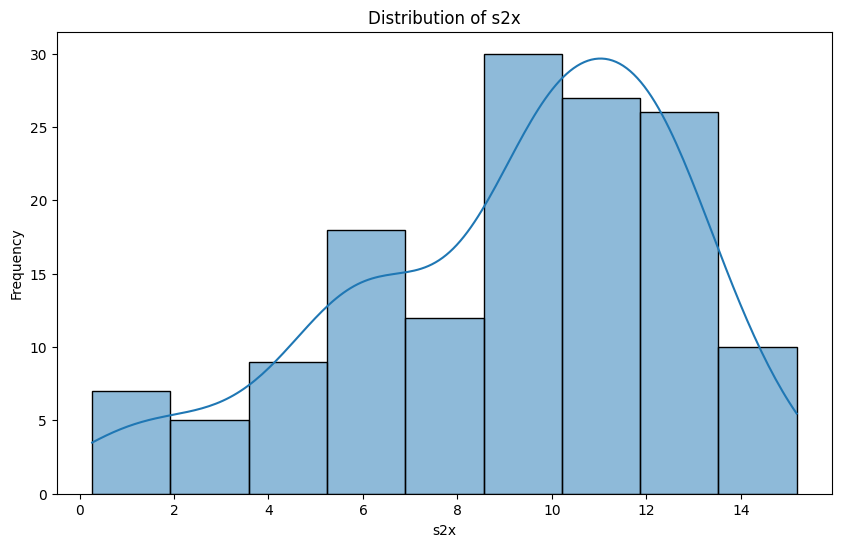


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       6.662575
std        3.122949
min        0.220000
25%        4.614925
50%        5.475550
75%       10.329475
max       11.557300
Name: s2i, dtype: float64


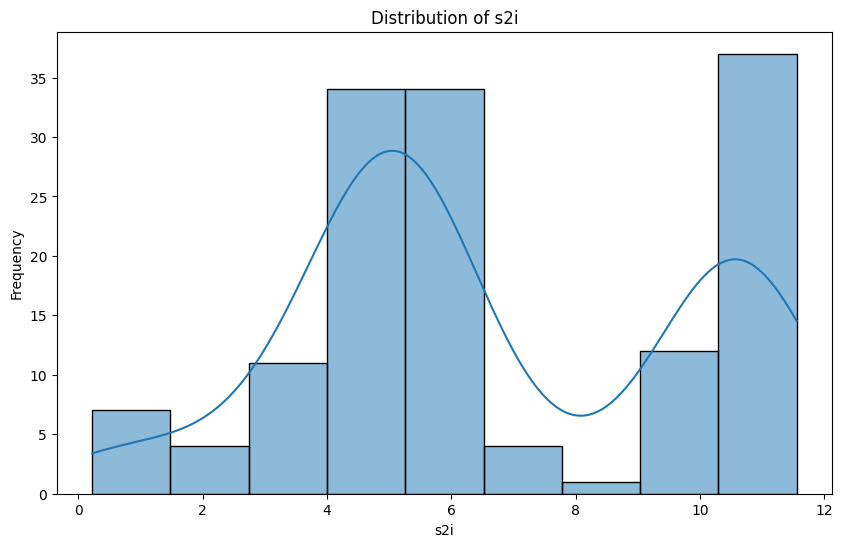


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.444433
std        0.284288
min        0.004590
25%        0.165240
50%        0.415395
75%        0.683910
max        1.133730
Name: s2s, dtype: float64


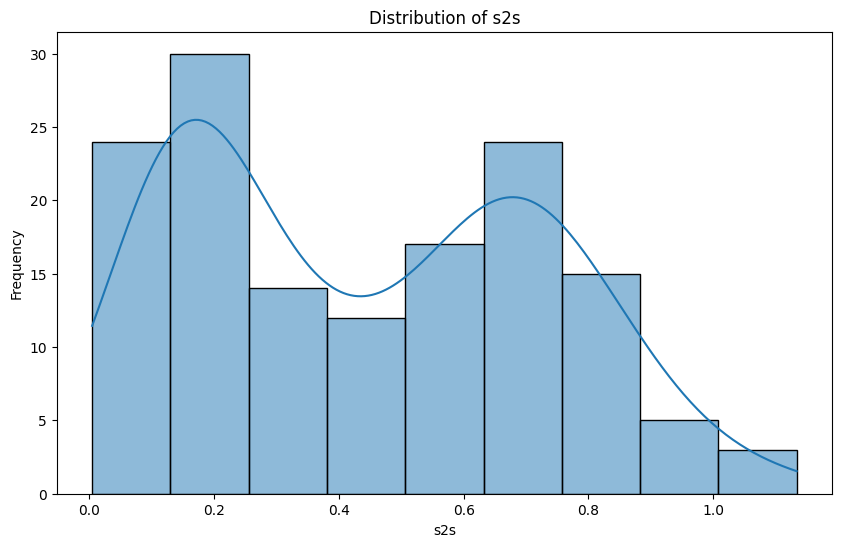


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       7.386238
std        2.903447
min        0.310150
25%        5.104717
50%        7.725035
75%       10.190550
max       11.667570
Name: s3a, dtype: float64


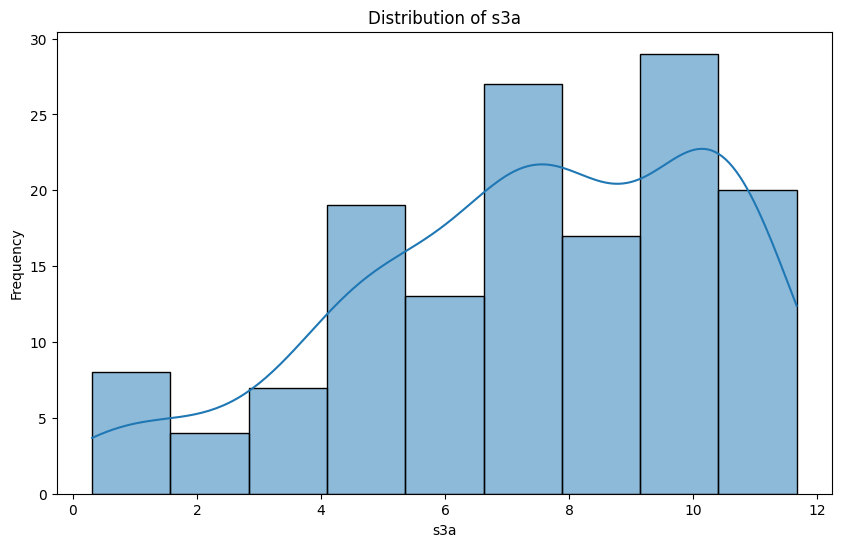


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       8.652568
std        3.288517
min        0.406480
25%        6.426918
50%        9.718090
75%       10.910710
max       14.488570
Name: s3x, dtype: float64


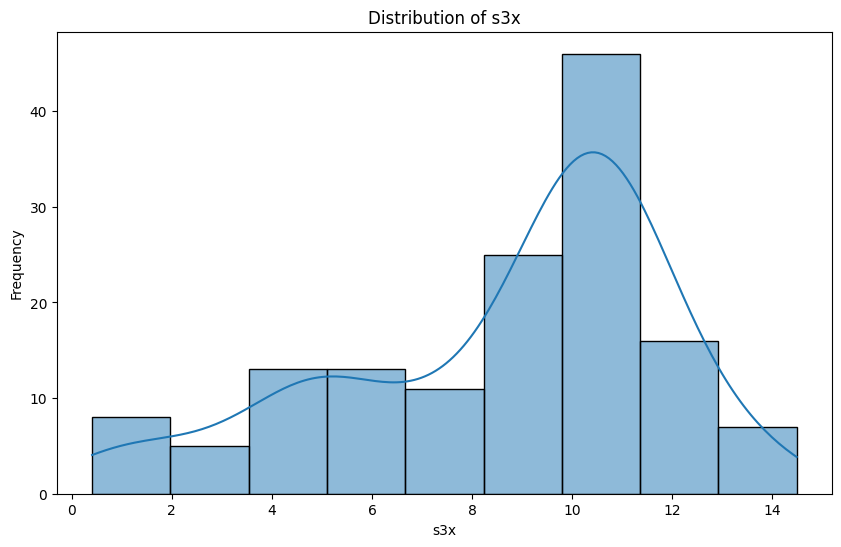


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       5.953883
std        2.649538
min        0.223000
25%        4.202222
50%        5.406310
75%        8.903897
max       10.176790
Name: s3i, dtype: float64


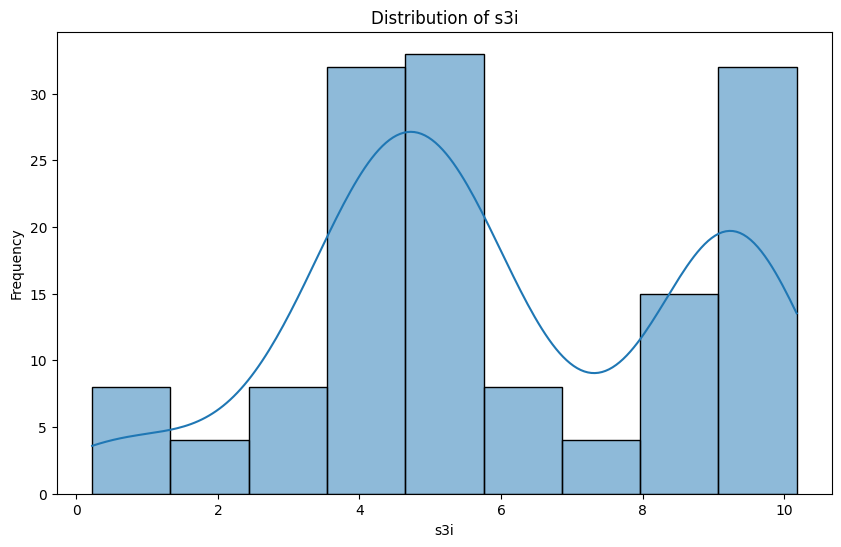


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.484406
std        0.290159
min        0.032110
25%        0.215590
50%        0.499985
75%        0.720160
max        1.284360
Name: s3s, dtype: float64


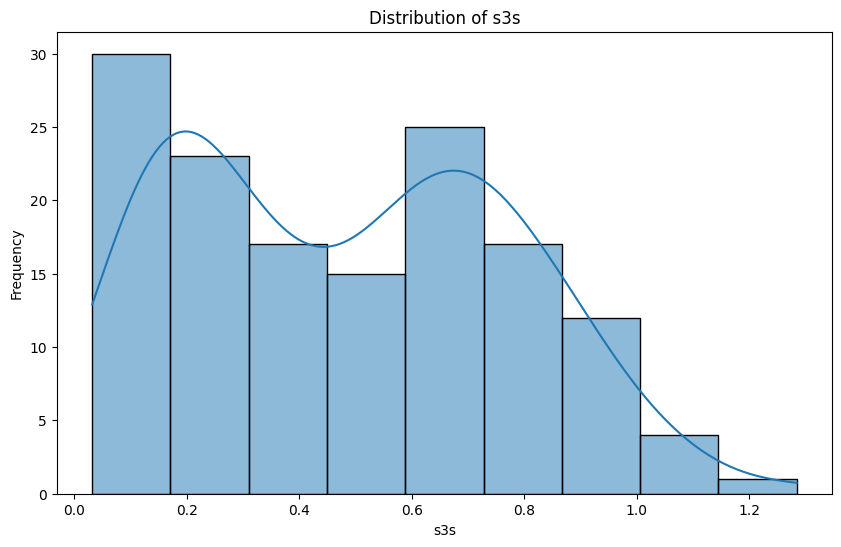


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean      48.194444
std       87.724161
min        1.000000
25%       12.000000
50%       18.000000
75%       34.250000
max      359.000000
Name: d1a, dtype: float64


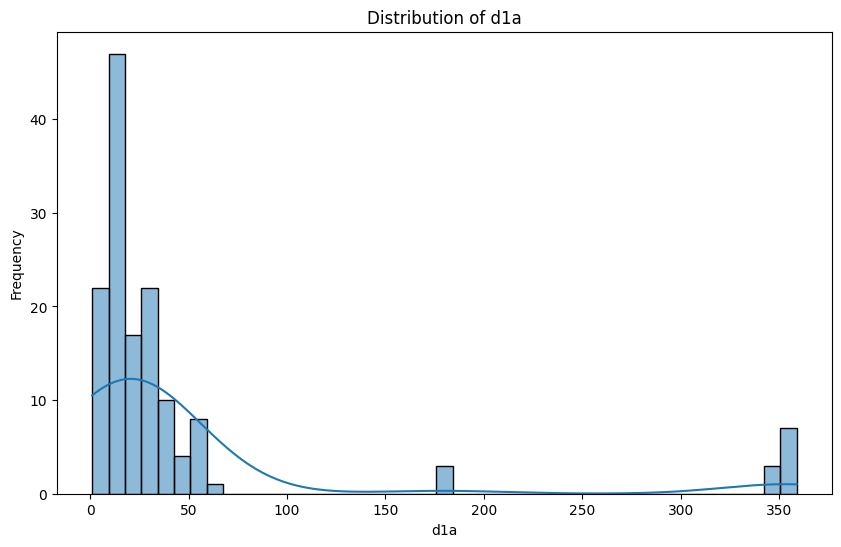


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       4.375000
std        6.362999
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       72.000000
Name: d1s, dtype: float64


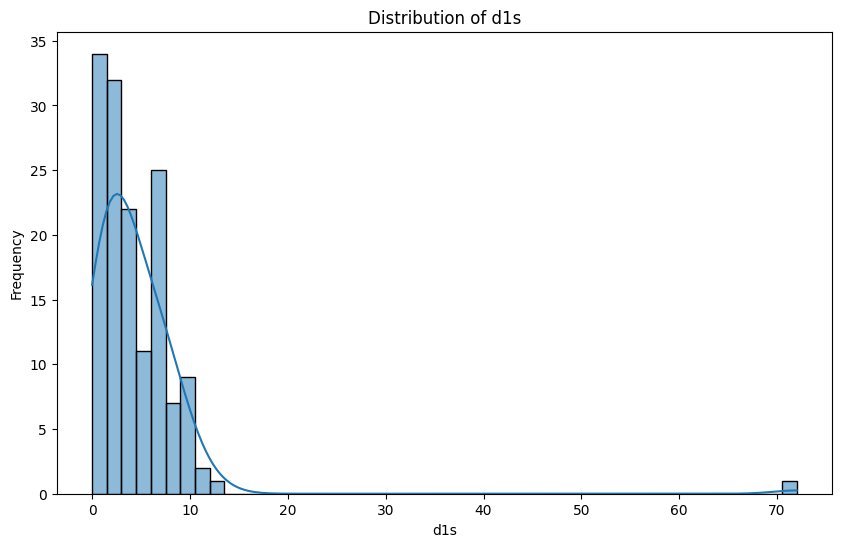


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean      58.131944
std       99.727548
min        1.000000
25%       10.000000
50%       21.500000
75%       42.250000
max      360.000000
Name: d2a, dtype: float64


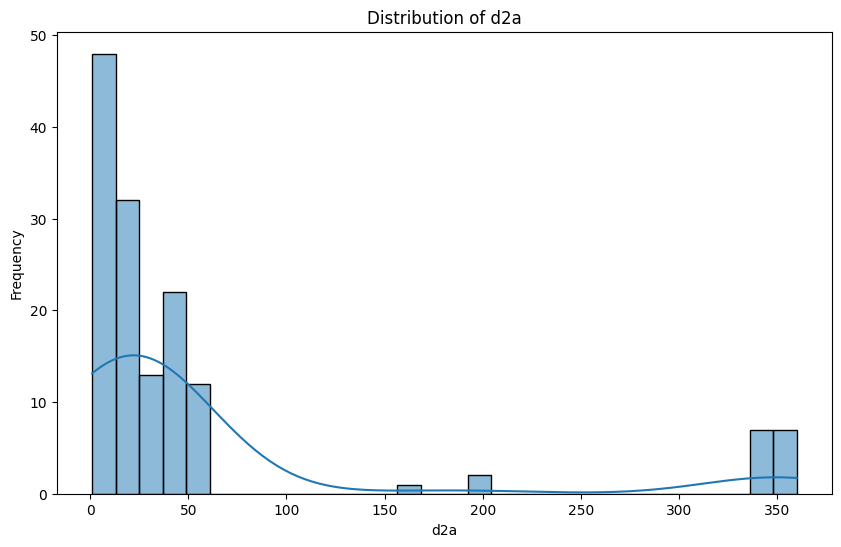


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       6.020833
std        5.326368
min        0.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       57.000000
Name: d2s, dtype: float64


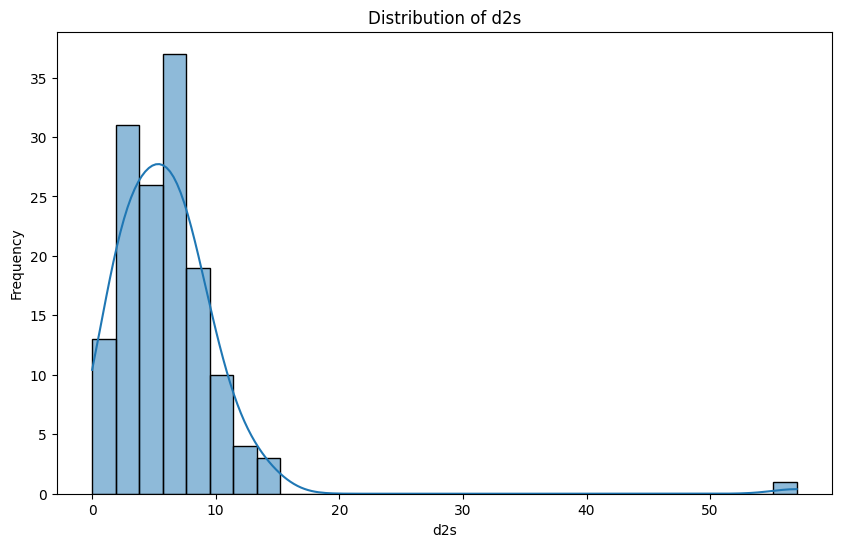


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      67.277778
std       13.583435
min       42.000000
25%       57.750000
50%       63.000000
75%       82.000000
max       88.000000
Name: h1a, dtype: float64


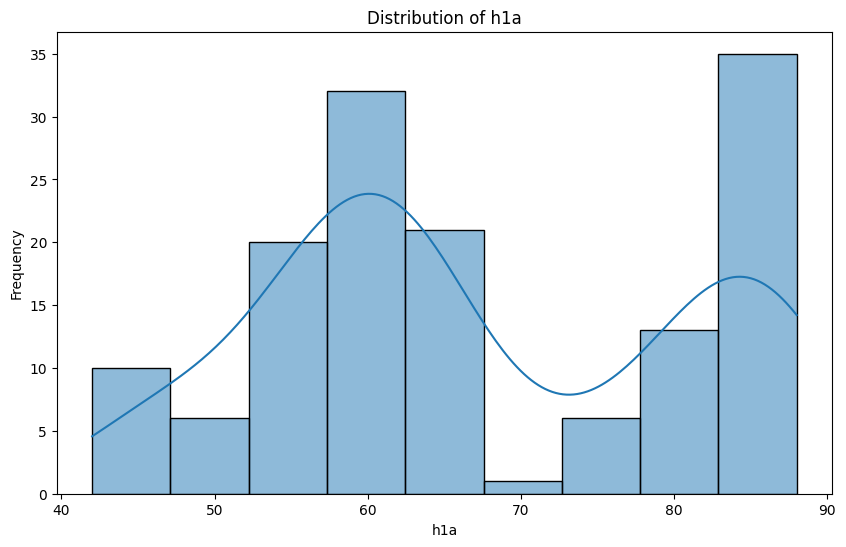


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      68.319444
std       13.172685
min       45.000000
25%       59.000000
50%       64.000000
75%       83.000000
max       89.000000
Name: h1x, dtype: float64


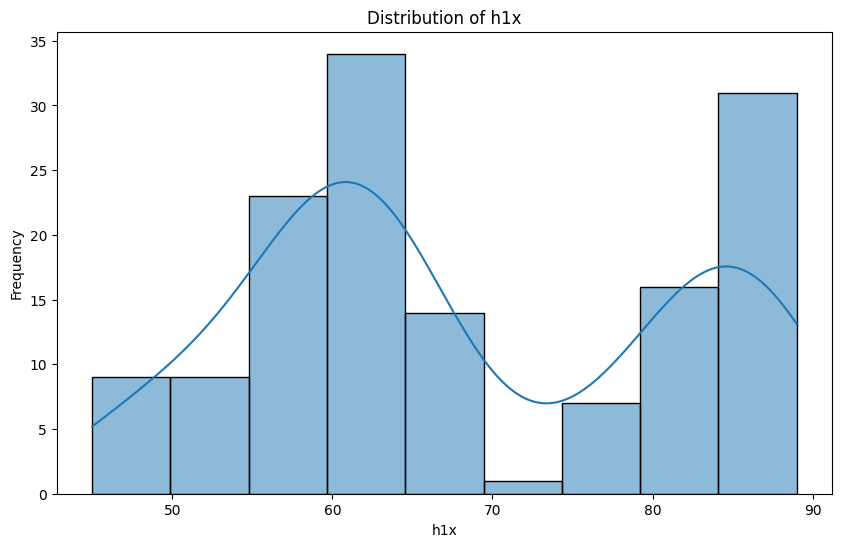


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      66.097222
std       14.095240
min       39.000000
25%       56.000000
50%       62.500000
75%       81.000000
max       88.000000
Name: h1i, dtype: float64


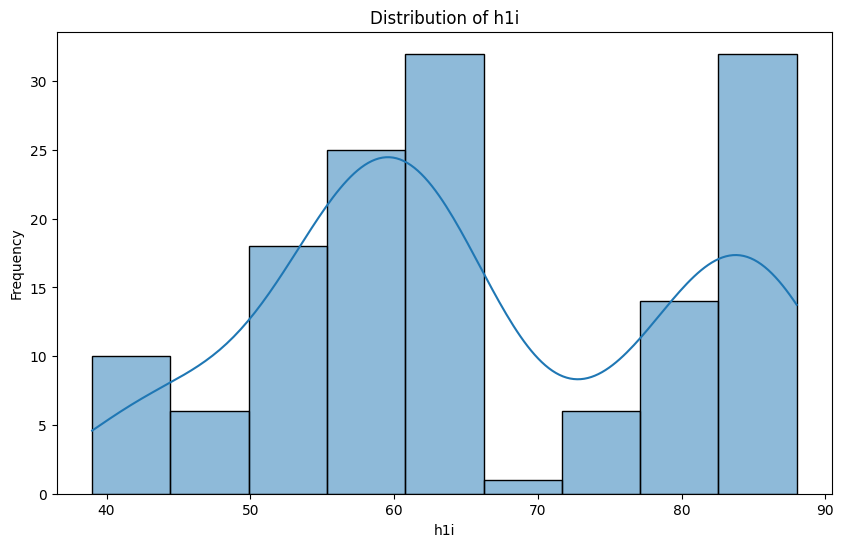


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       1.196528
std        2.077617
min       -2.450000
25%       -1.175000
50%        2.150000
75%        2.650000
max        3.850000
Name: t1a, dtype: float64


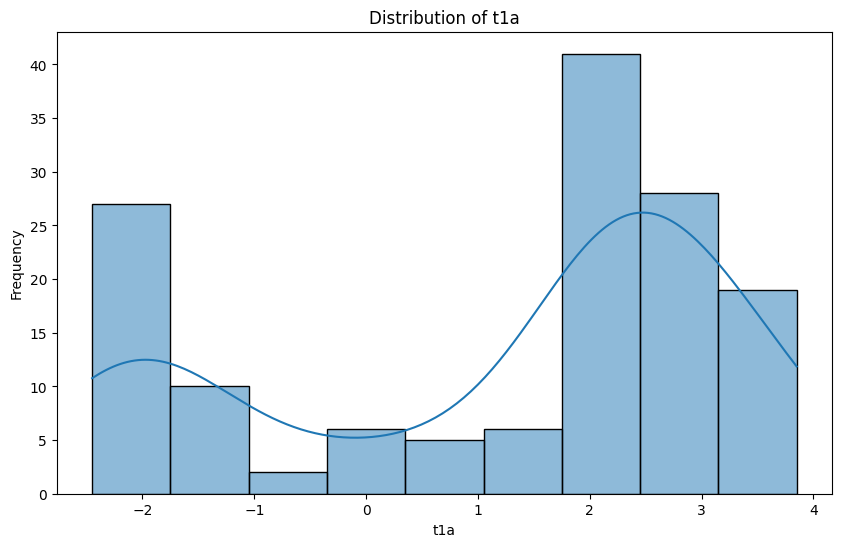


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       1.286806
std        2.086009
min       -2.350000
25%       -1.150000
50%        2.250000
75%        2.750000
max        3.950000
Name: t1x, dtype: float64


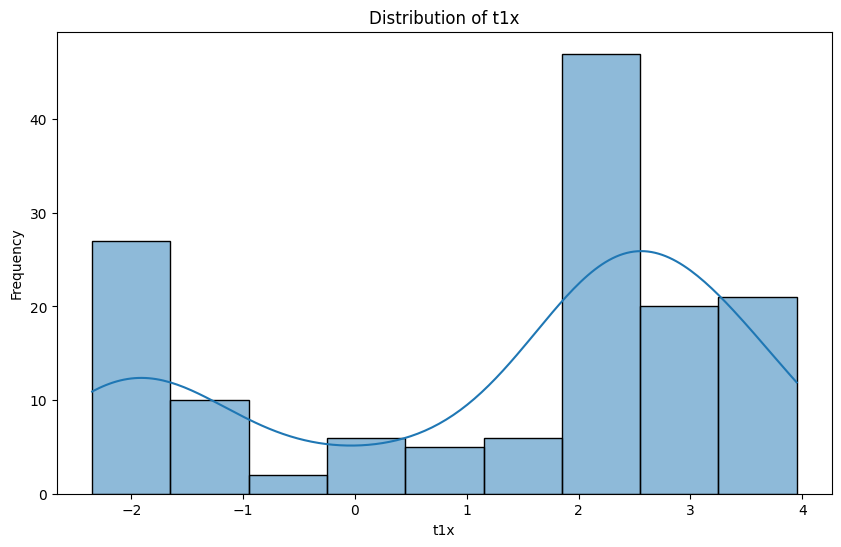


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       1.105556
std        2.071545
min       -2.550000
25%       -1.275000
50%        2.050000
75%        2.575000
max        3.750000
Name: t1i, dtype: float64


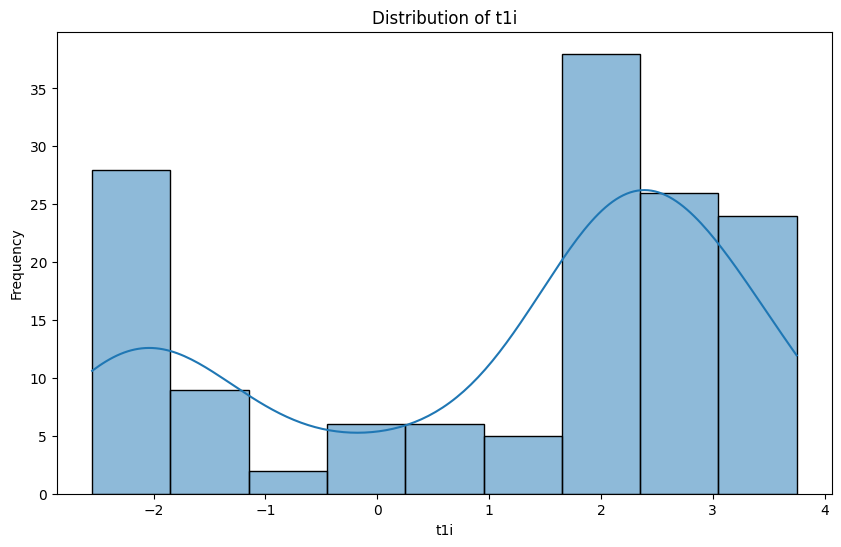


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1027.840278
std         3.139336
min      1022.000000
25%      1025.000000
50%      1028.000000
75%      1031.000000
max      1032.000000
Name: b1a, dtype: float64


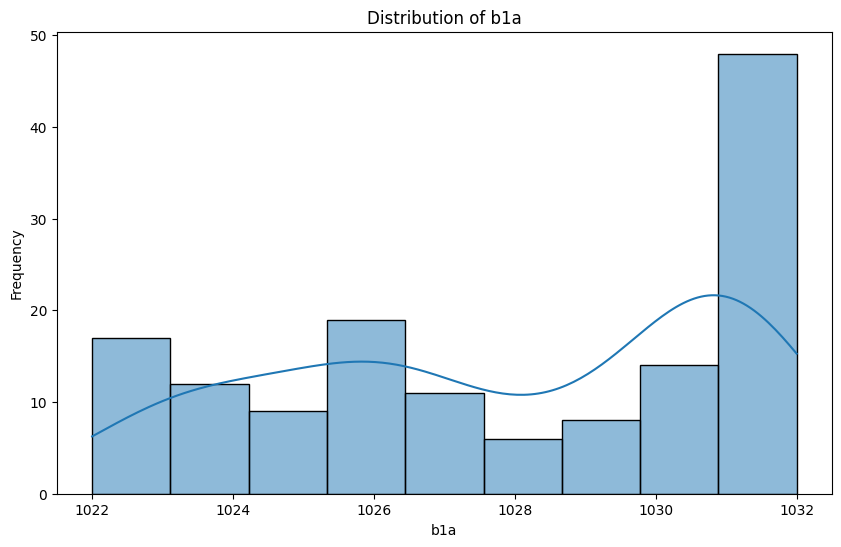


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1028.152778
std         3.209077
min      1022.000000
25%      1025.750000
50%      1029.000000
75%      1031.000000
max      1032.000000
Name: b1x, dtype: float64


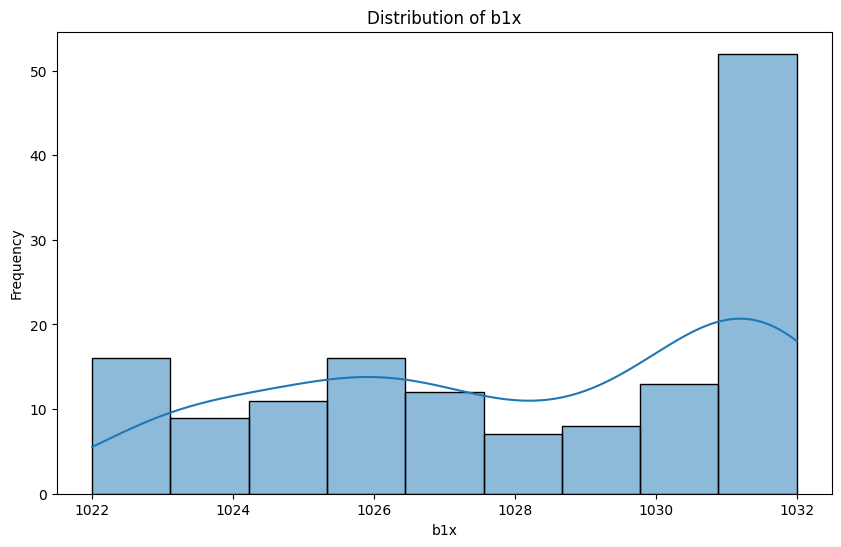


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1027.402778
std         3.198163
min      1021.000000
25%      1025.000000
50%      1028.000000
75%      1031.000000
max      1031.000000
Name: b1i, dtype: float64


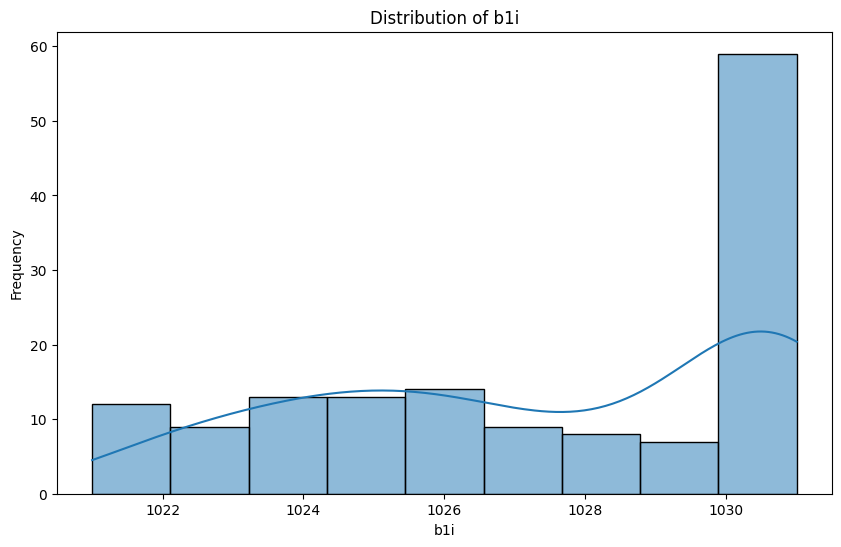


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       6.399826
std        2.286142
min        0.241760
25%        4.749960
50%        7.387480
75%        7.969773
max        9.718950
Name: p1a, dtype: float64


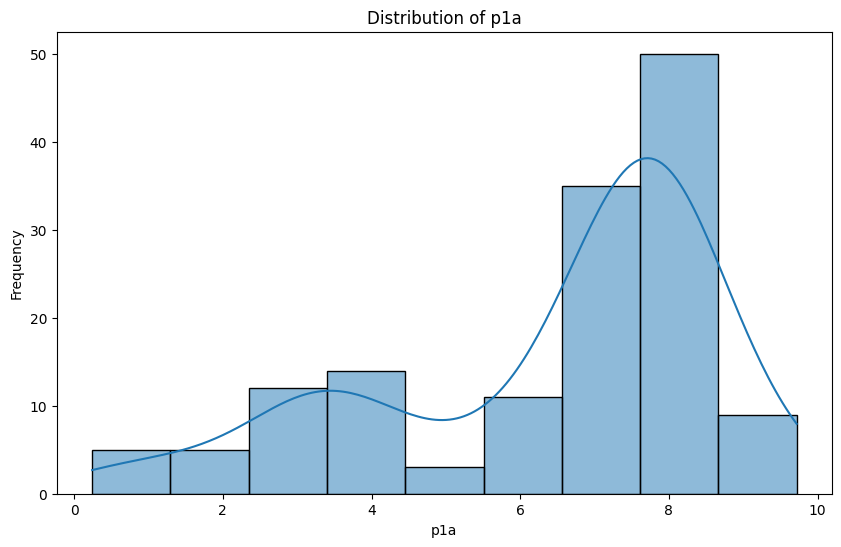


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       7.881766
std        2.929580
min        0.319700
25%        5.787312
50%        9.099975
75%        9.764800
max       12.469950
Name: p1x, dtype: float64


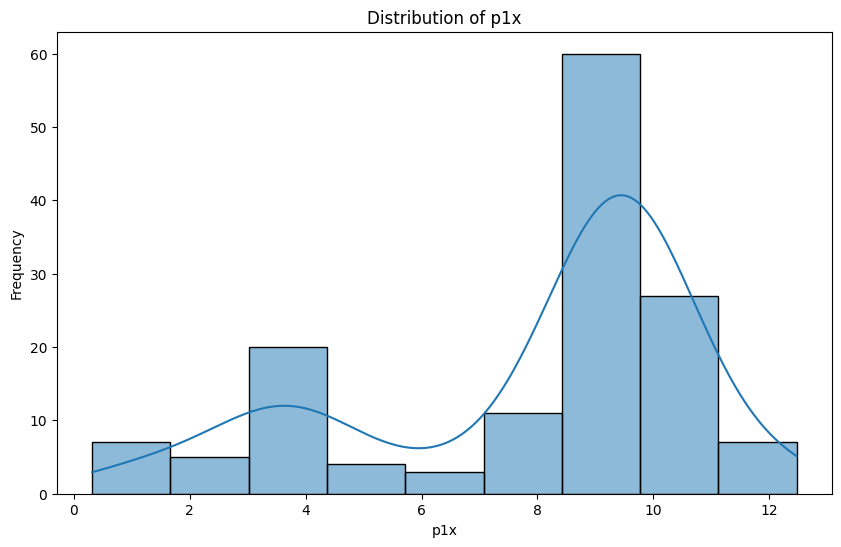


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       4.696465
std        1.665503
min        0.228000
25%        3.563588
50%        4.858850
75%        6.062413
max        7.518150
Name: p1i, dtype: float64


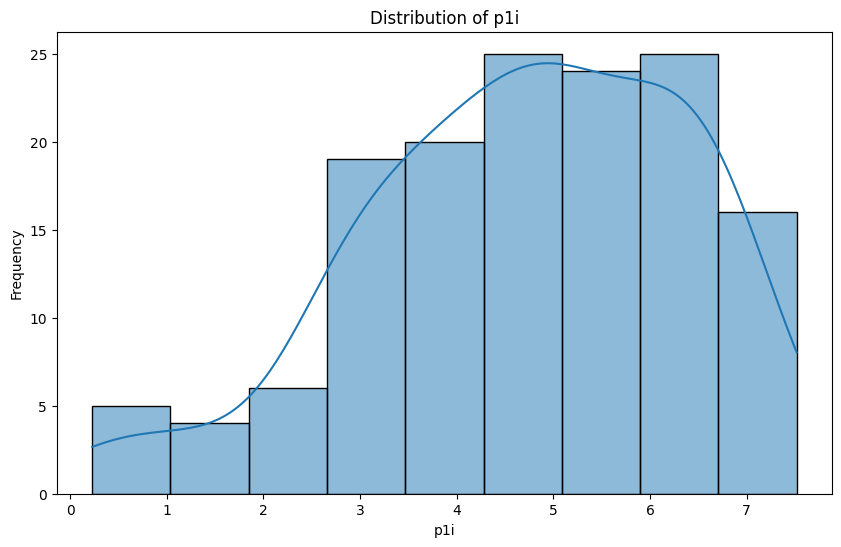


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.576726
std        0.303441
min        0.022930
25%        0.388582
50%        0.598345
75%        0.811550
max        1.247120
Name: p1s, dtype: float64


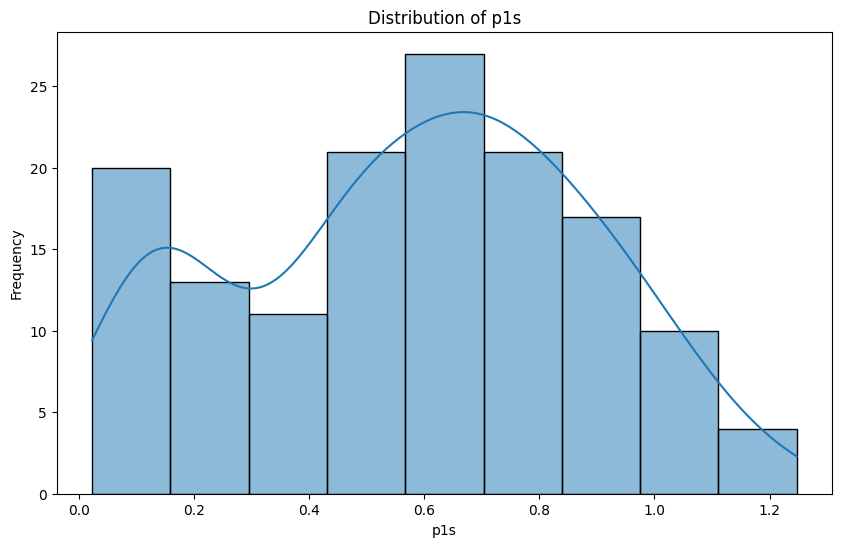


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      40.131944
std        5.038657
min       31.000000
25%       36.750000
50%       40.000000
75%       45.000000
max       47.000000
Name: tia, dtype: float64


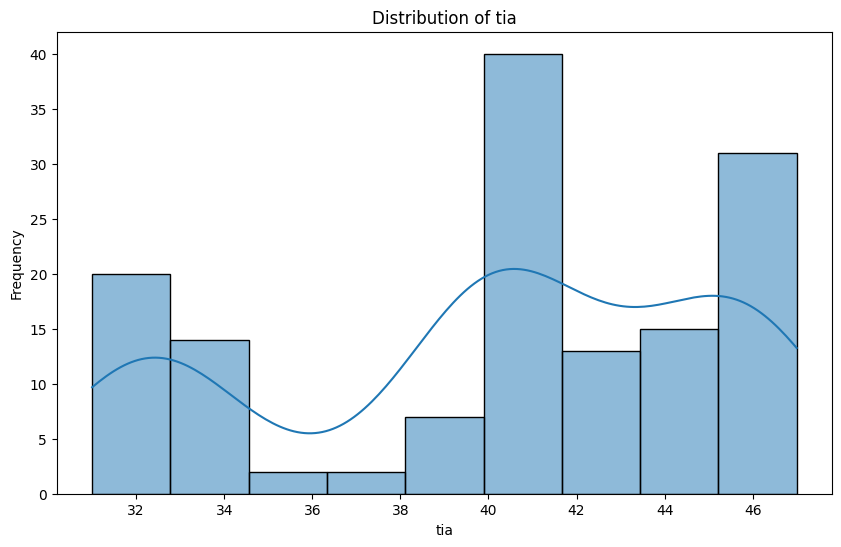


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      40.236111
std        5.059072
min       31.000000
25%       36.750000
50%       40.000000
75%       45.000000
max       47.000000
Name: tix, dtype: float64


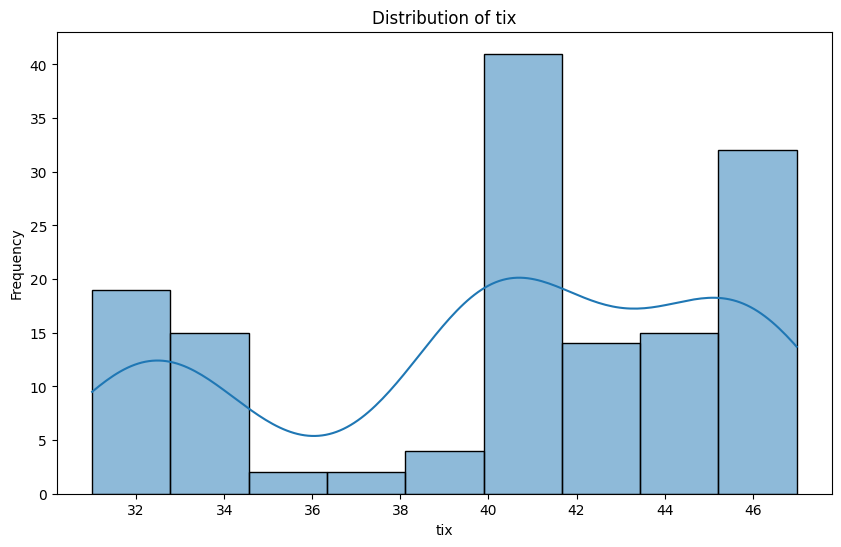


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      40.041667
std        5.086490
min       31.000000
25%       35.750000
50%       40.000000
75%       45.000000
max       47.000000
Name: tii, dtype: float64


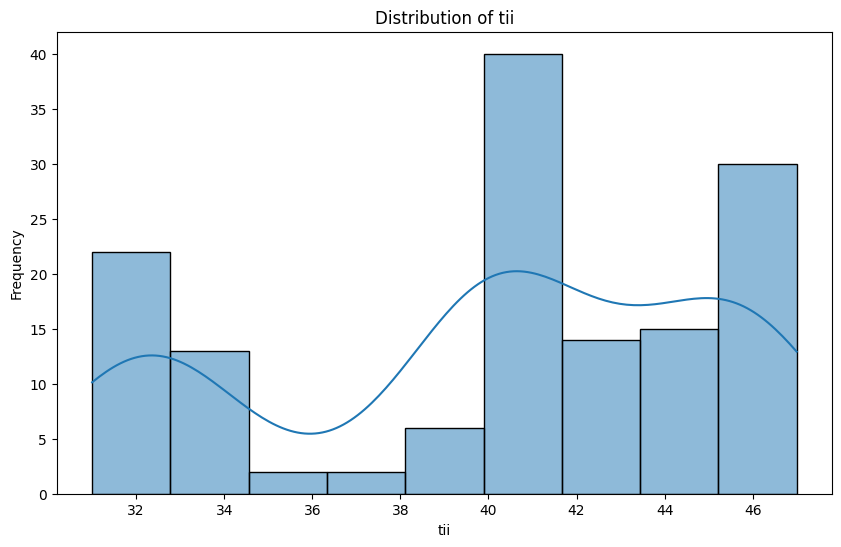


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.979167
std        6.247202
min      124.000000
25%      126.000000
50%      127.000000
75%      138.000000
max      140.000000
Name: vxa, dtype: float64


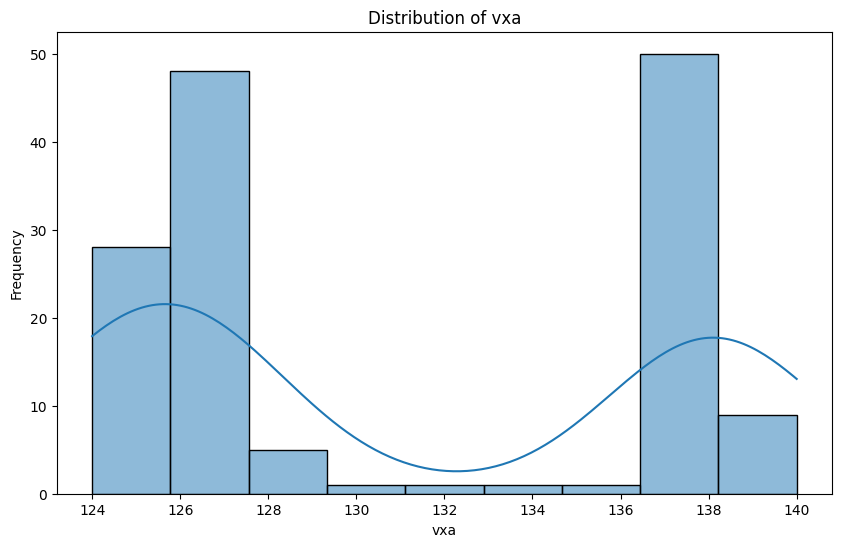


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     131.166667
std        6.332290
min      124.000000
25%      126.000000
50%      127.000000
75%      138.000000
max      140.000000
Name: vxx, dtype: float64


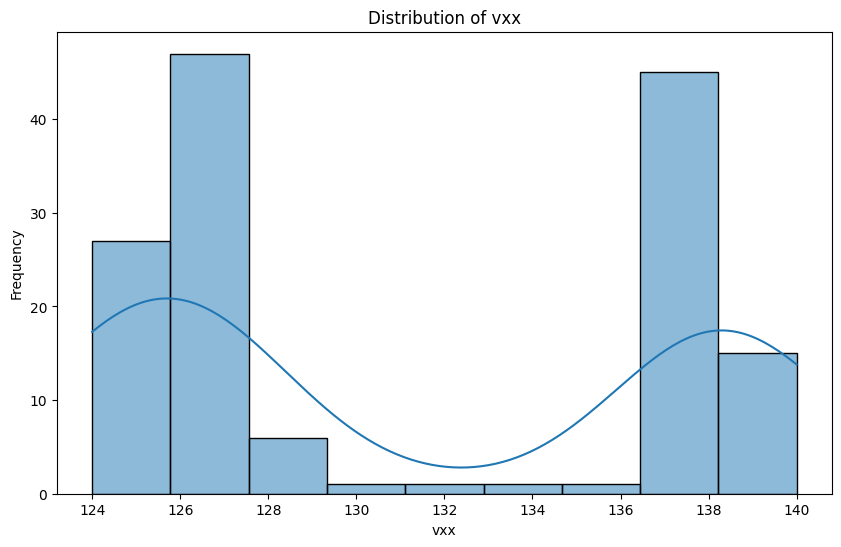


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.604167
std        5.951105
min      124.000000
25%      126.000000
50%      127.000000
75%      137.000000
max      140.000000
Name: vxi, dtype: float64


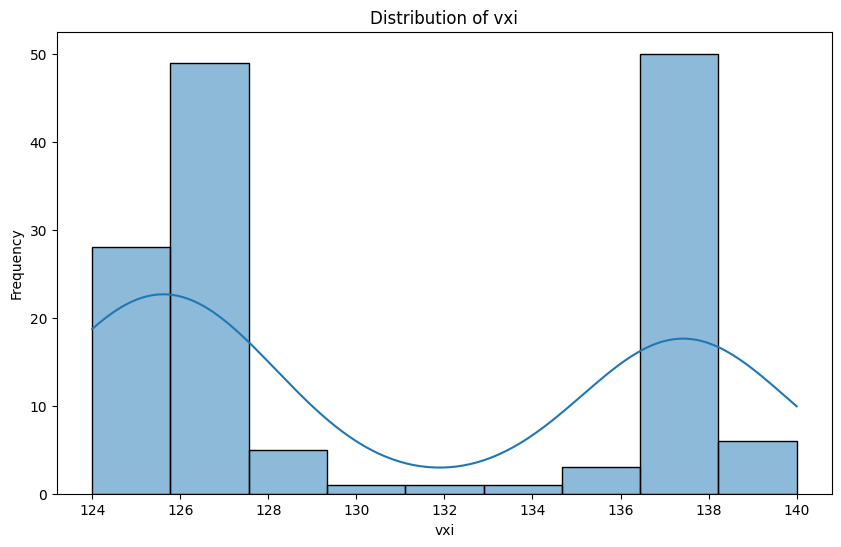


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


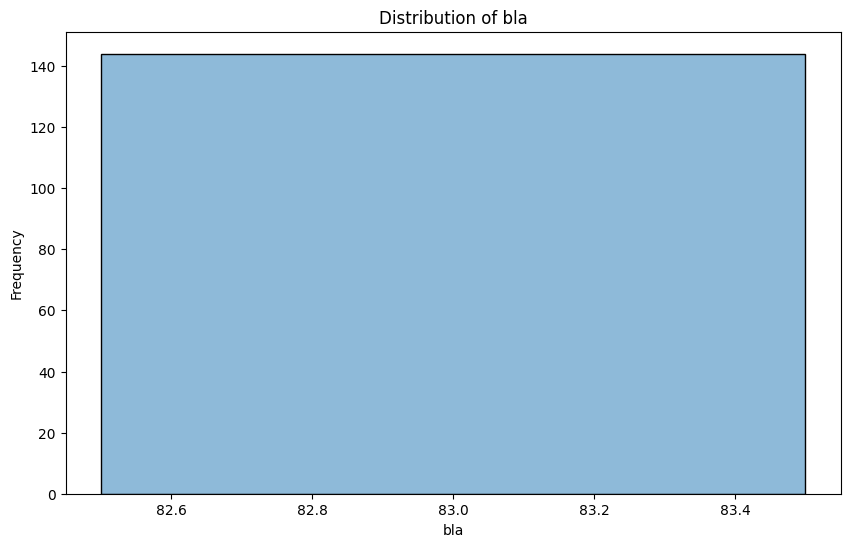


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


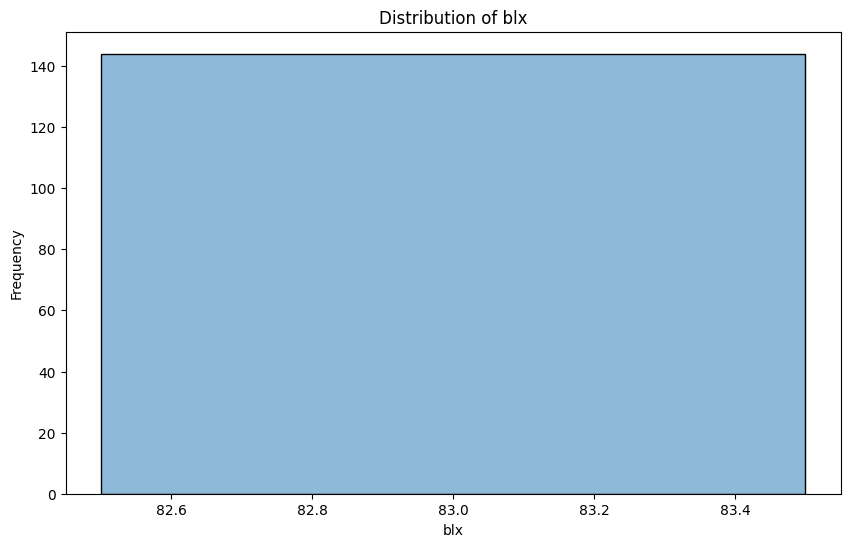


Analysis for column: bli
Descriptive Statistics:
count    144.000000
mean      82.972222
std        0.164909
min       82.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       83.000000
Name: bli, dtype: float64


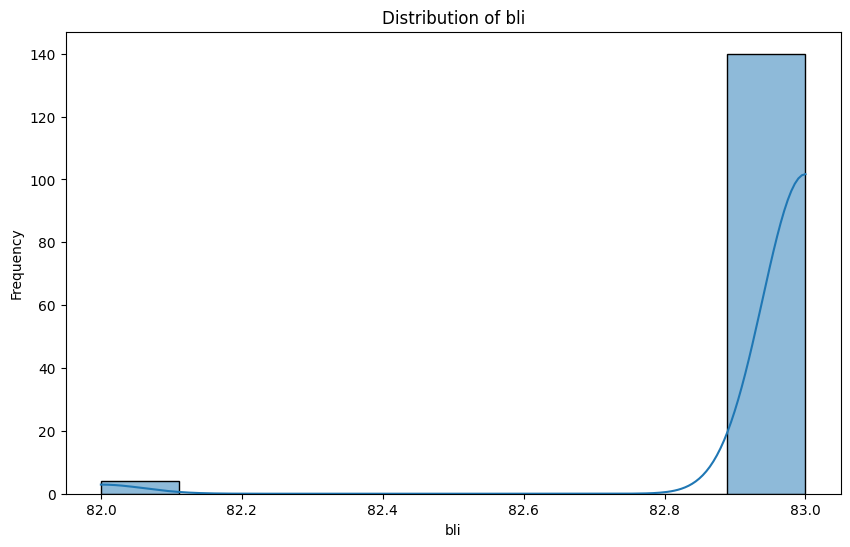


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


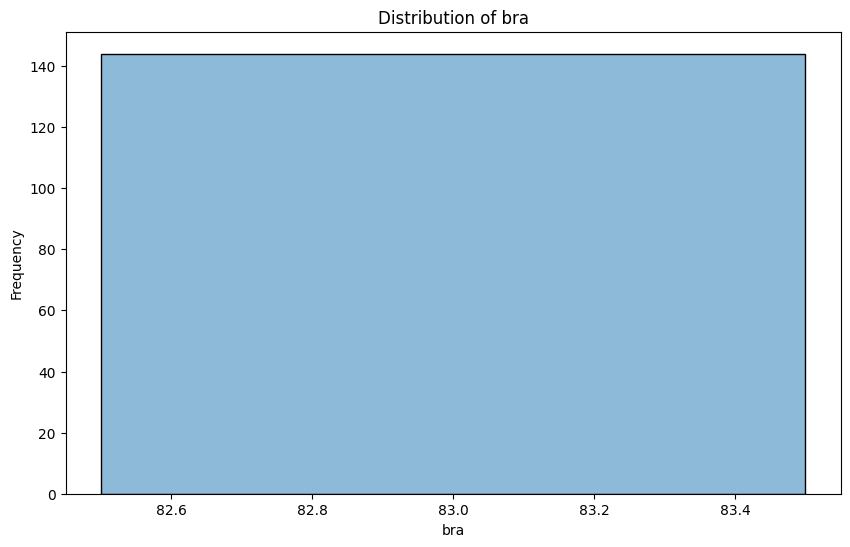


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


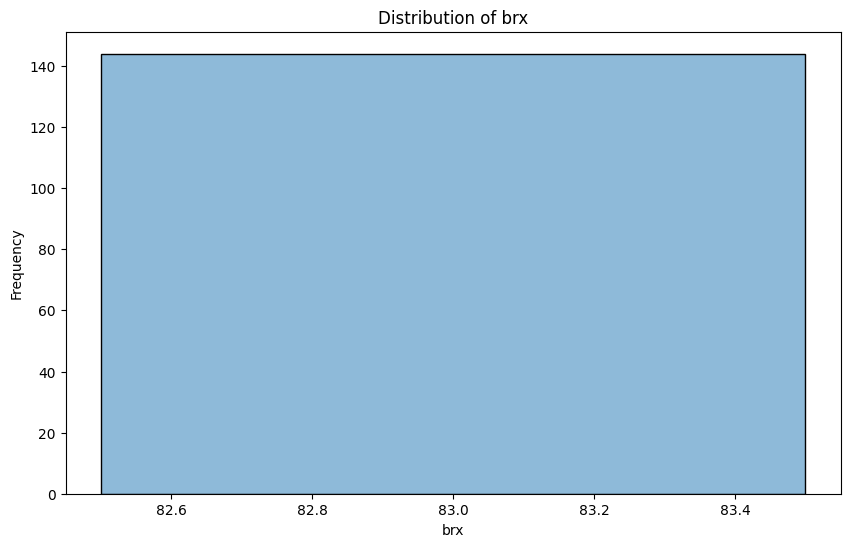


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


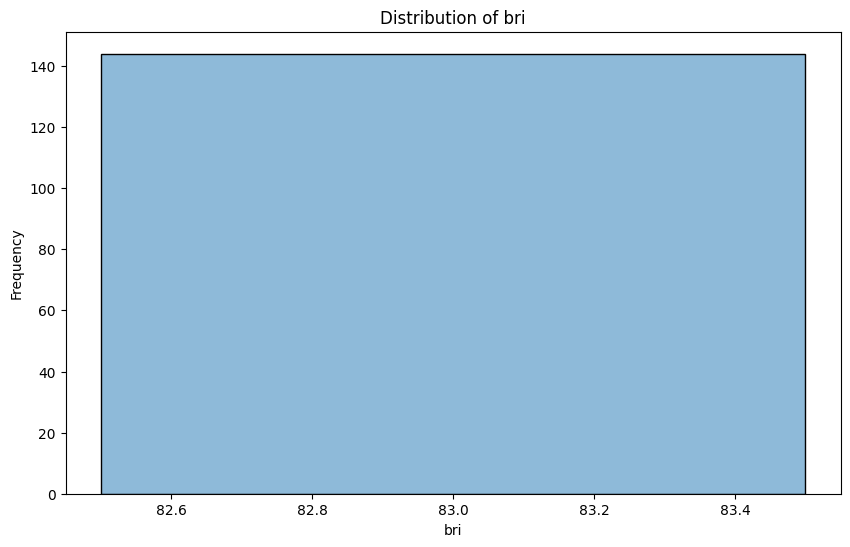

In [12]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

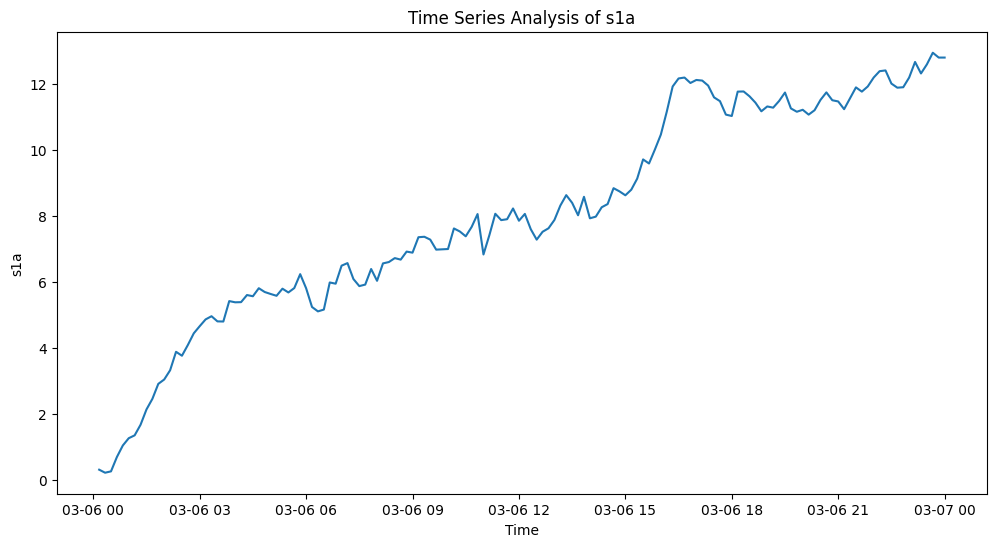

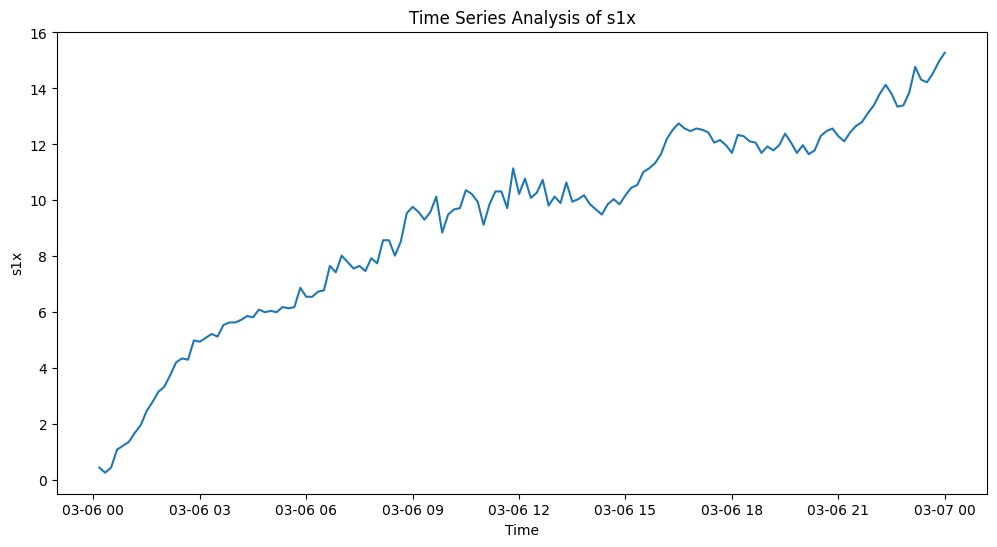

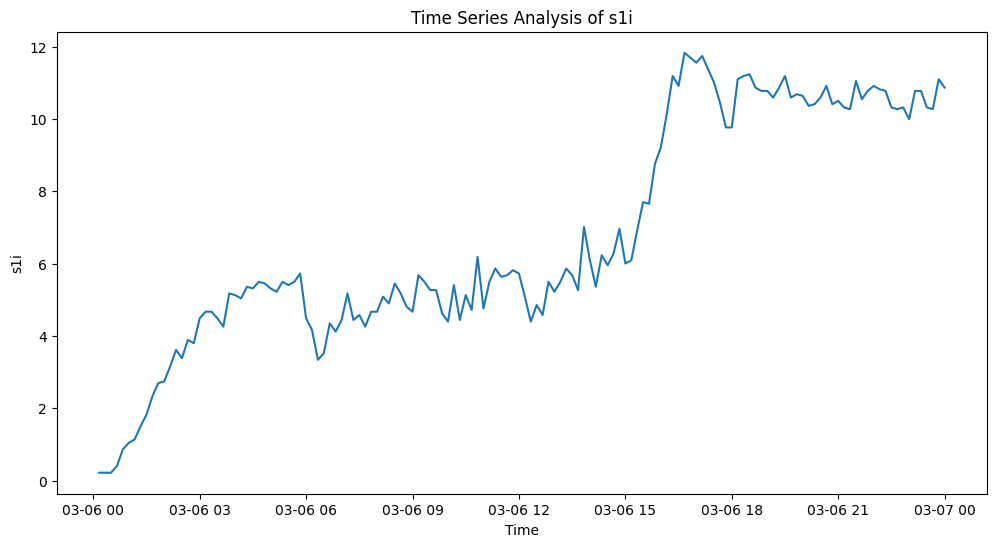

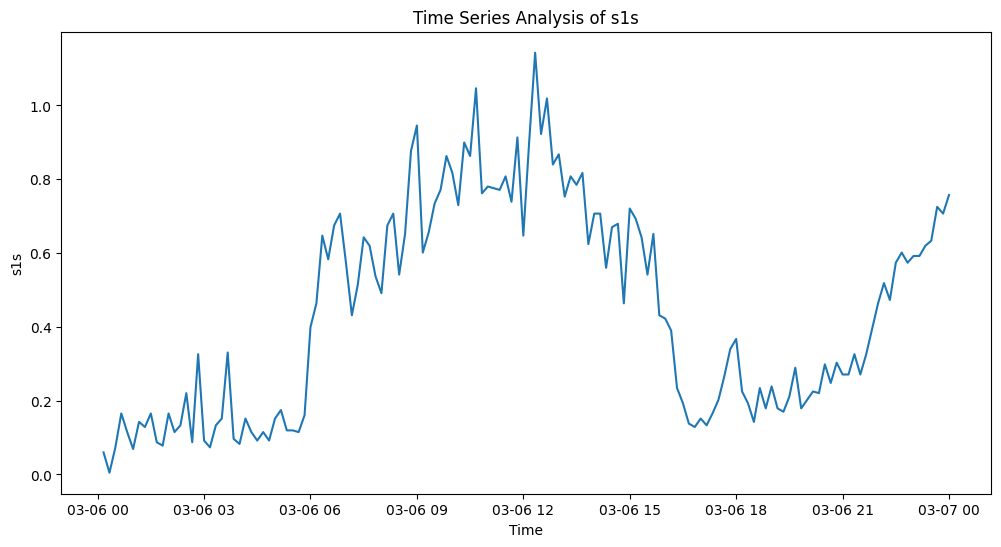

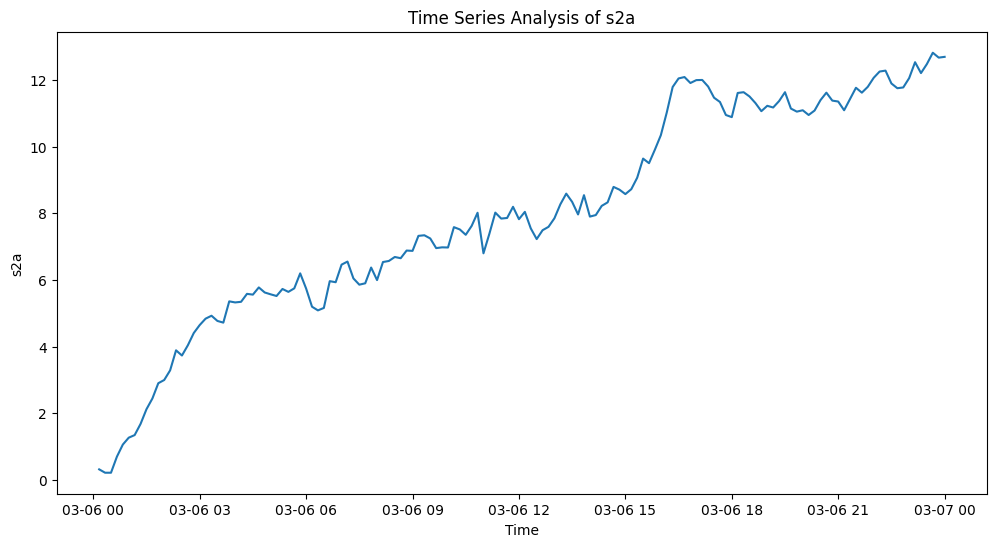

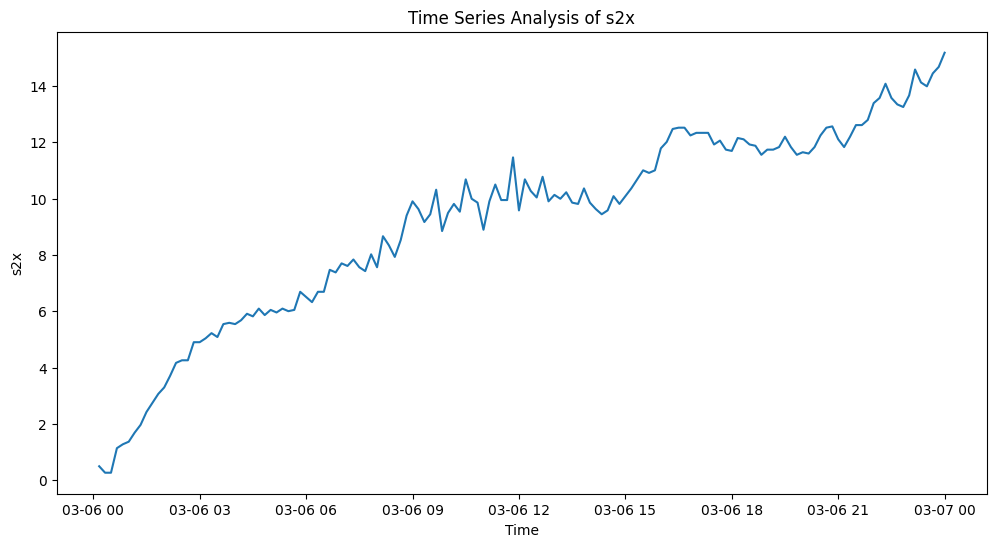

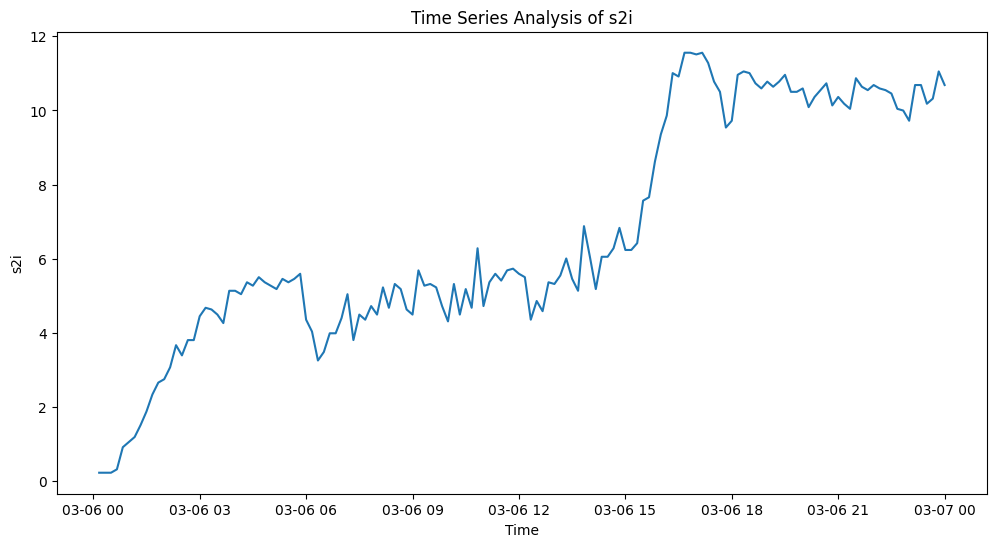

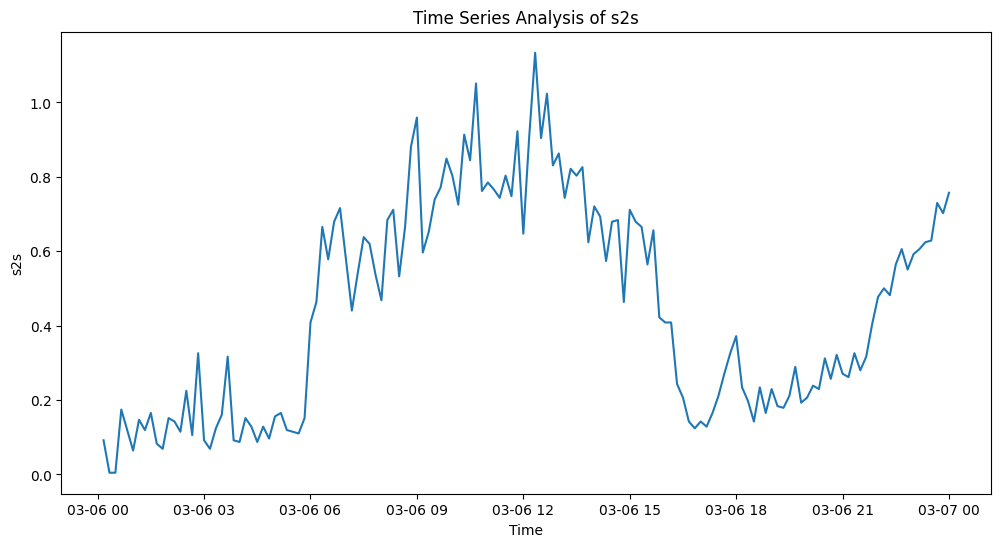

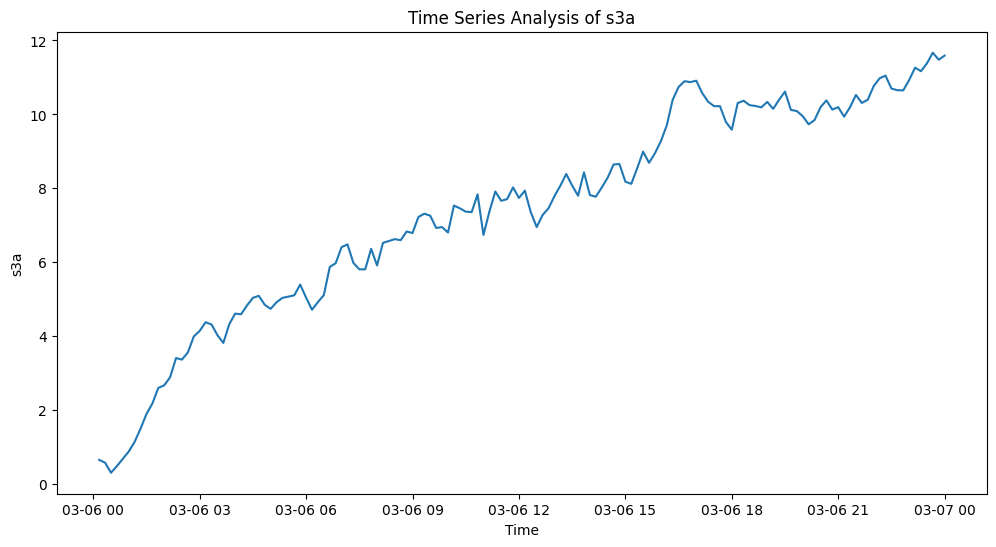

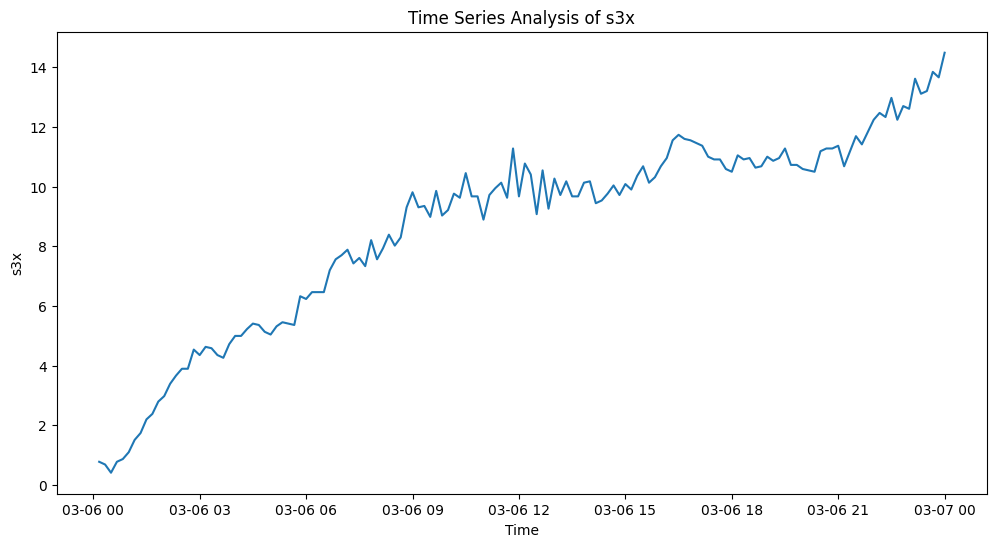

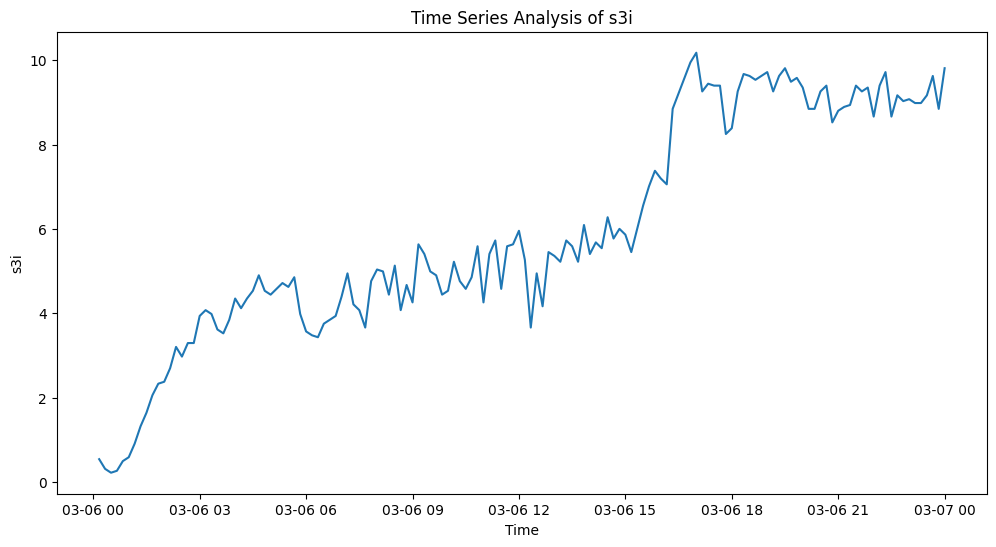

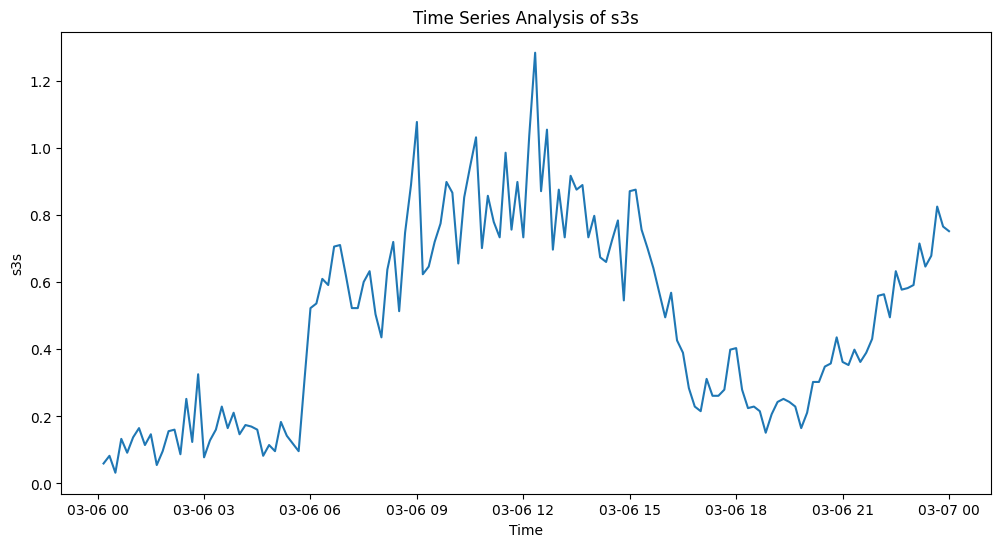

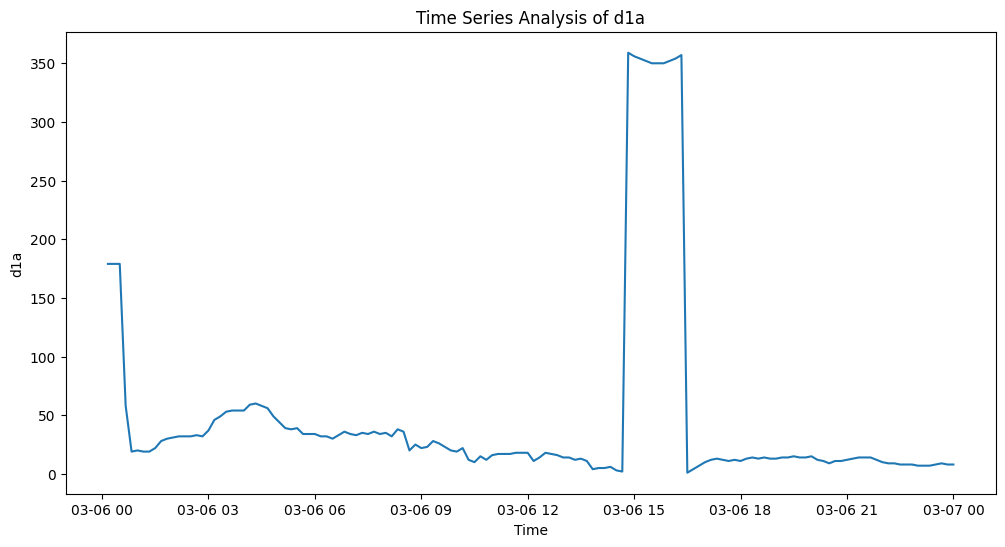

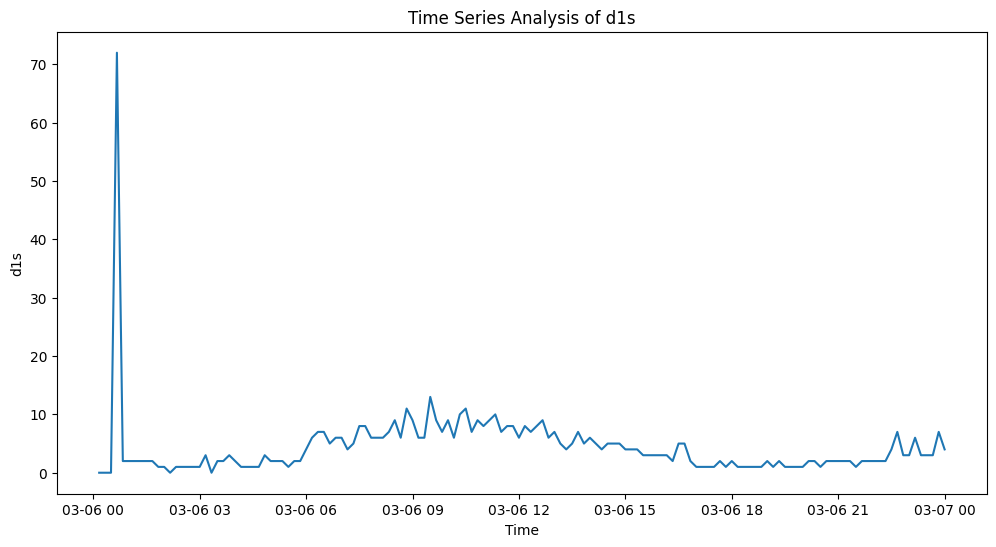

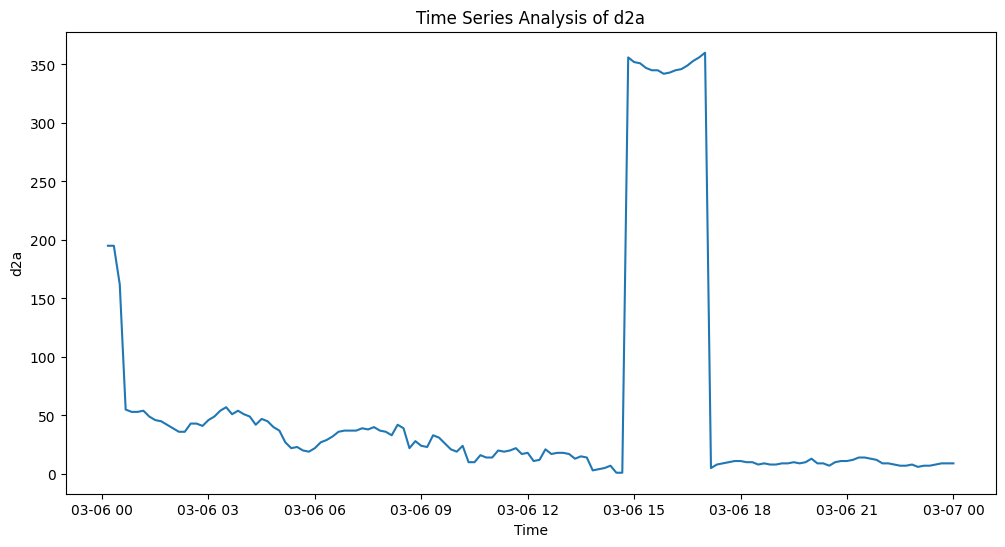

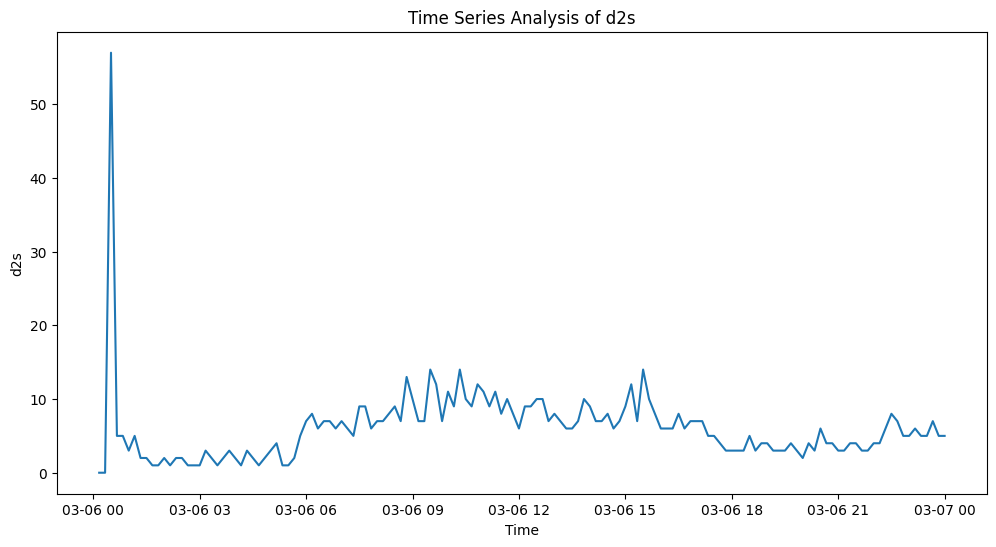

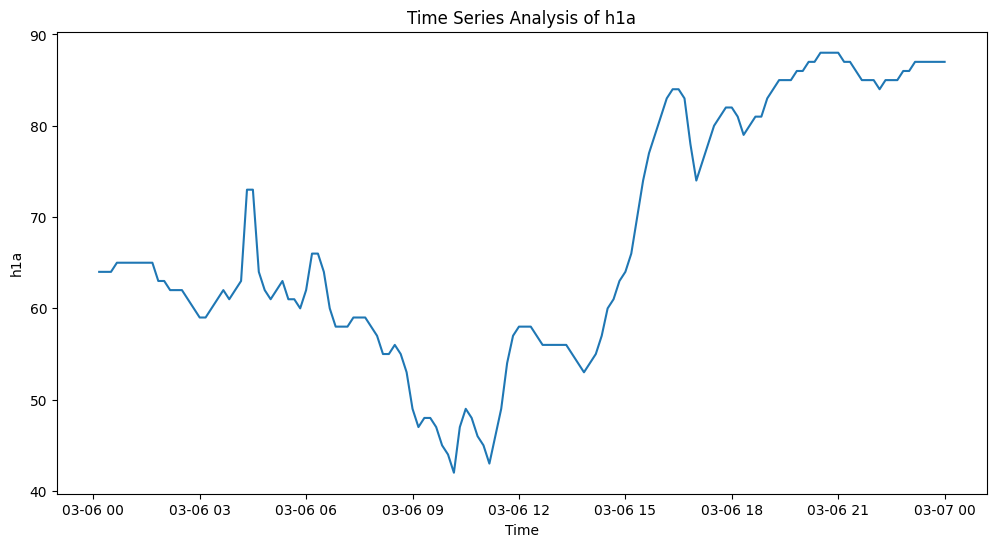

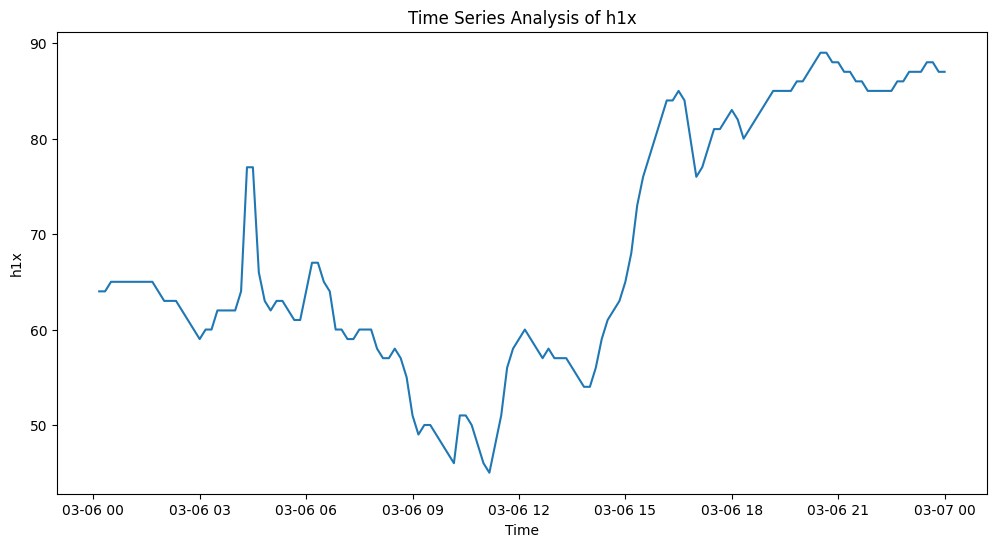

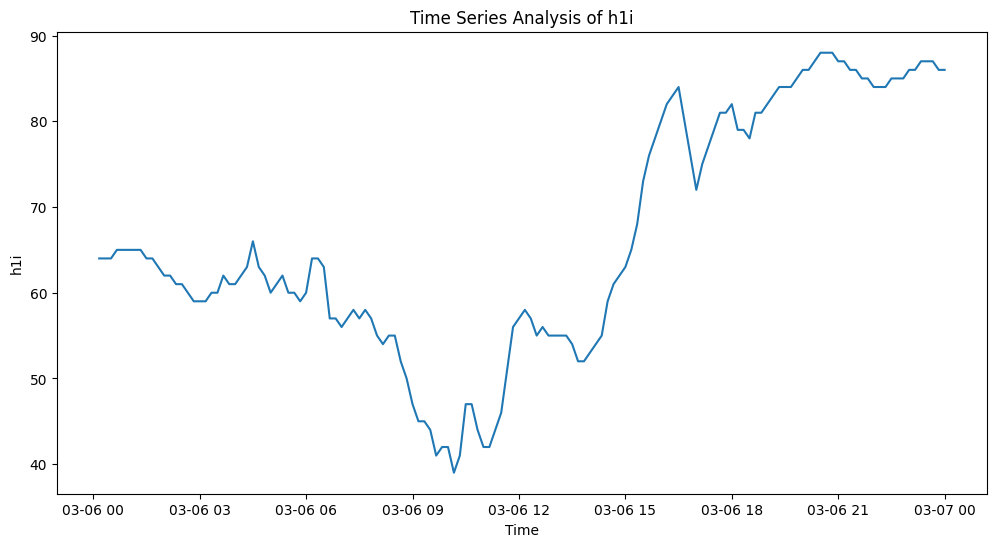

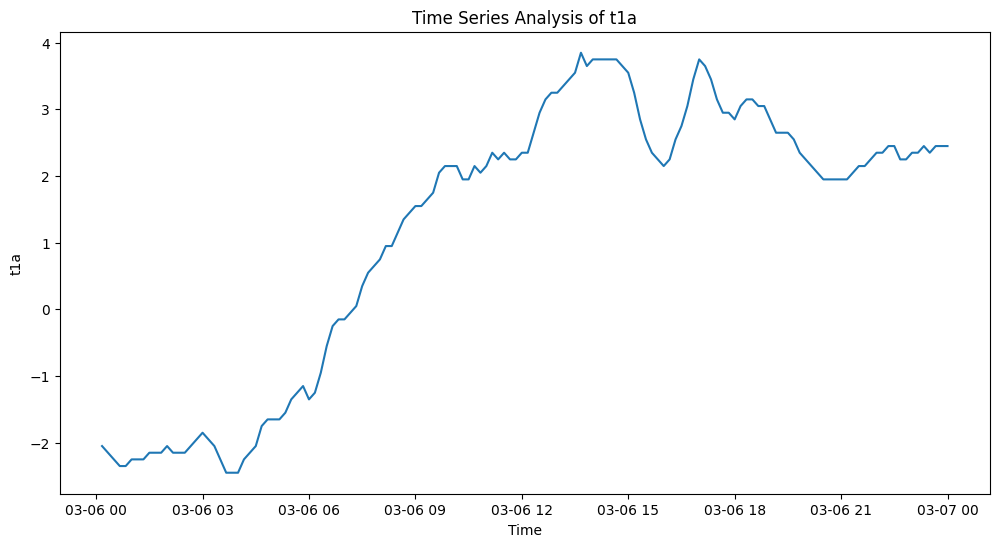

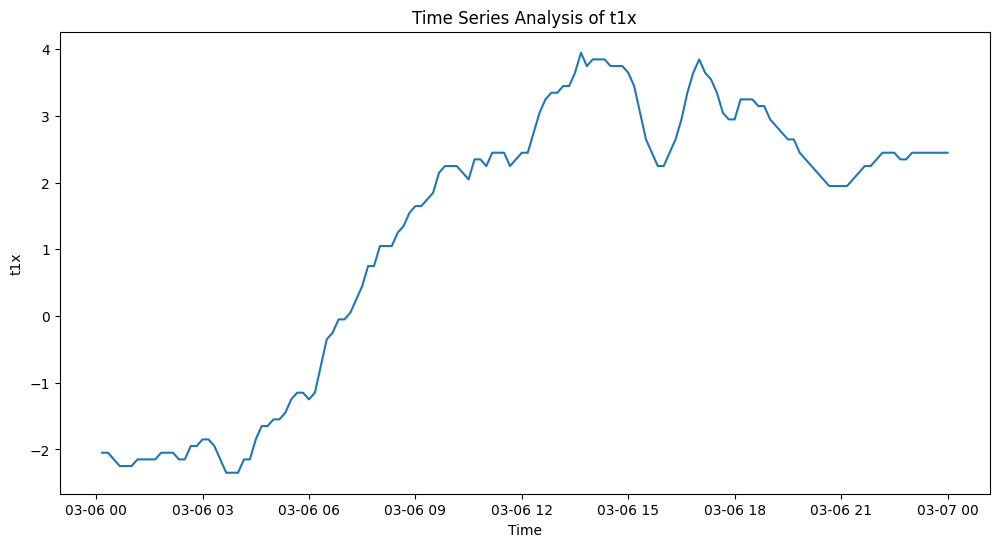

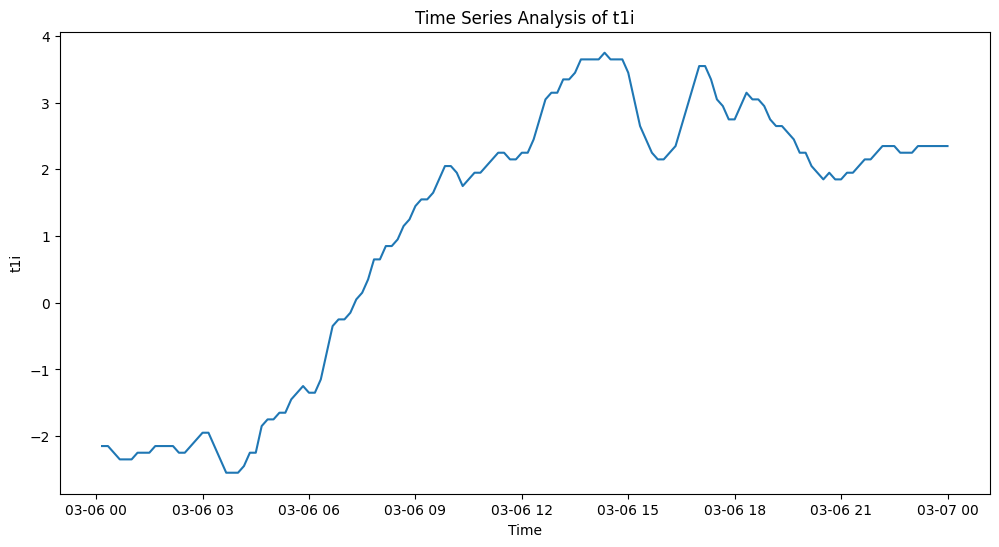

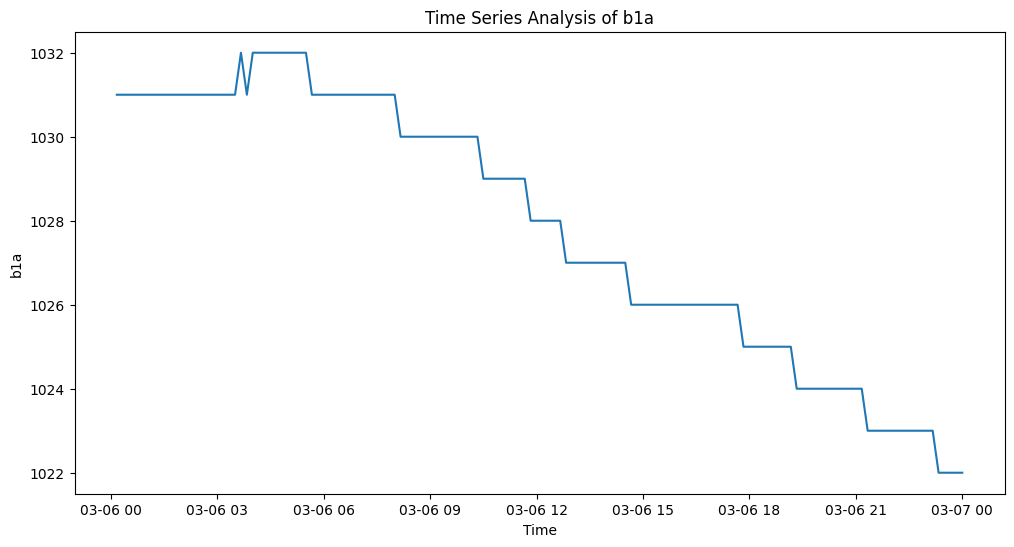

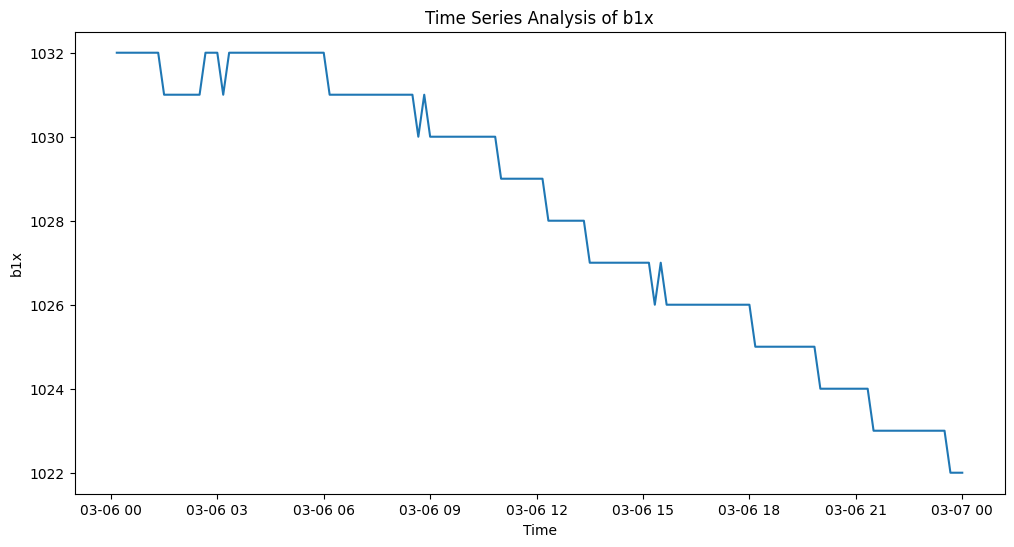

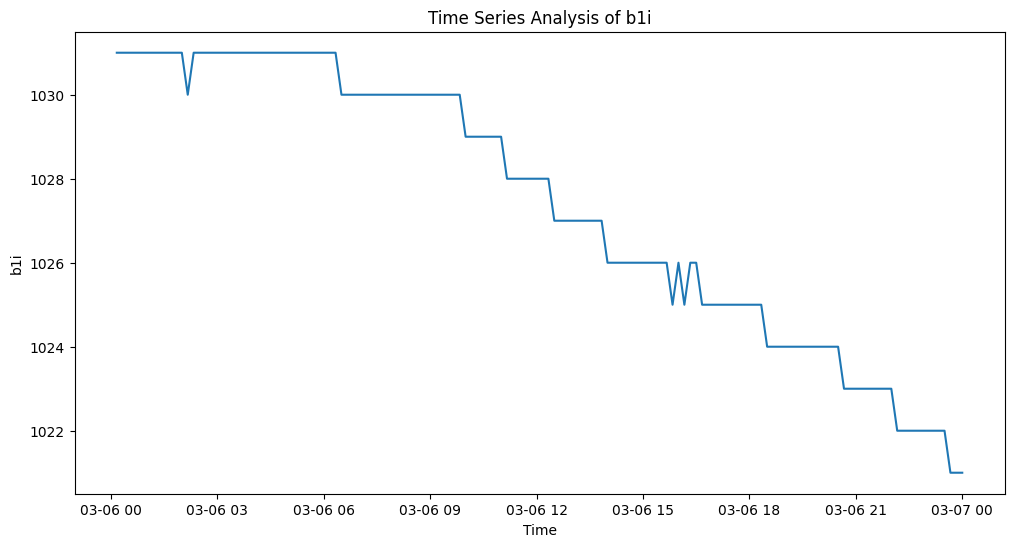

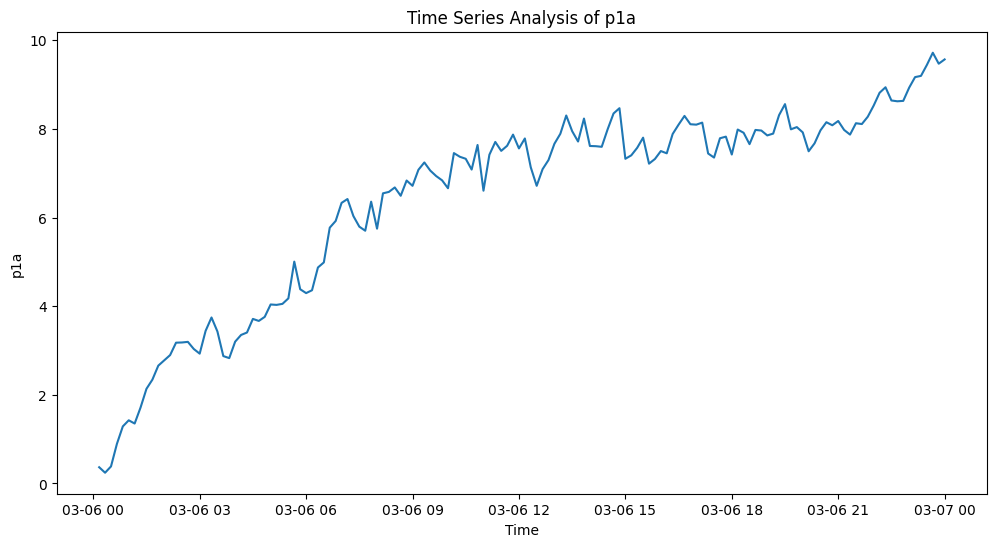

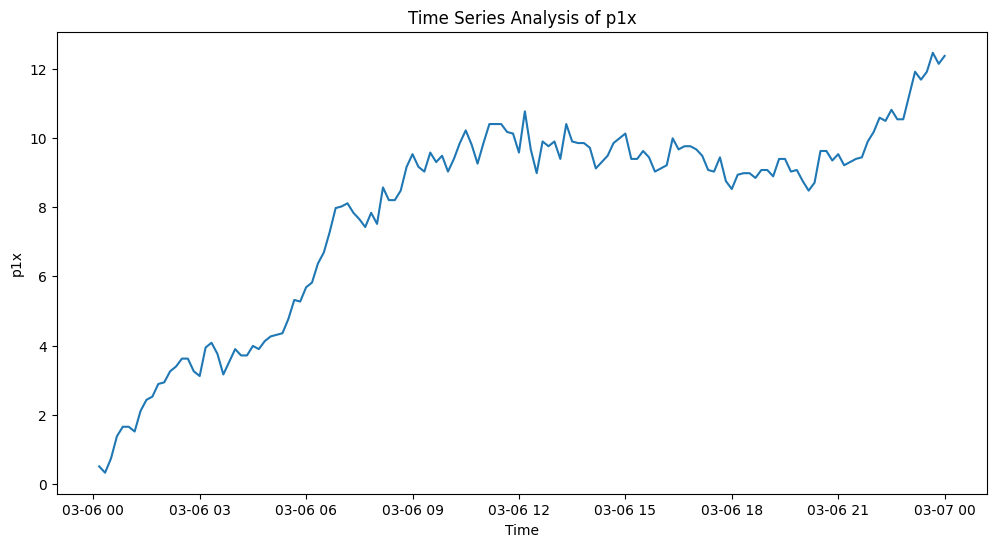

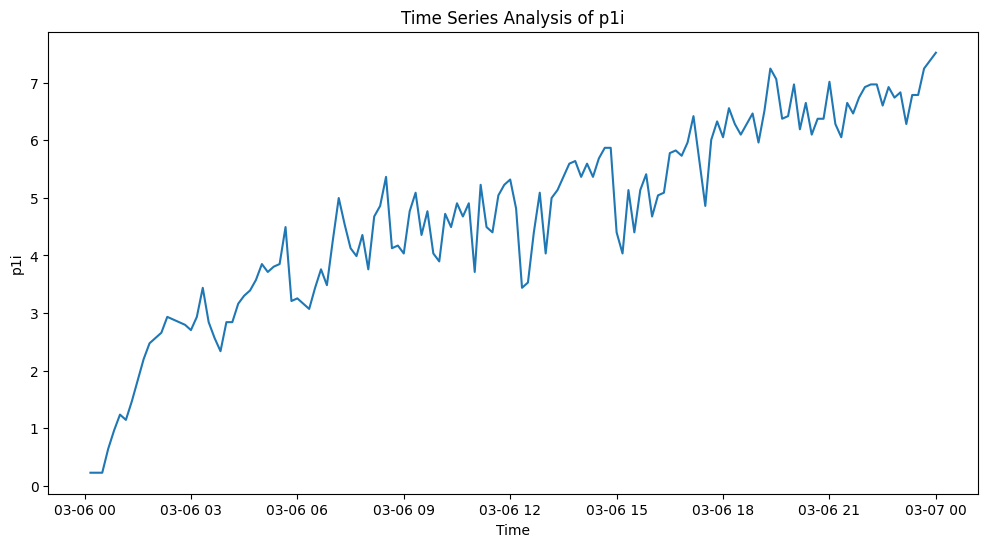

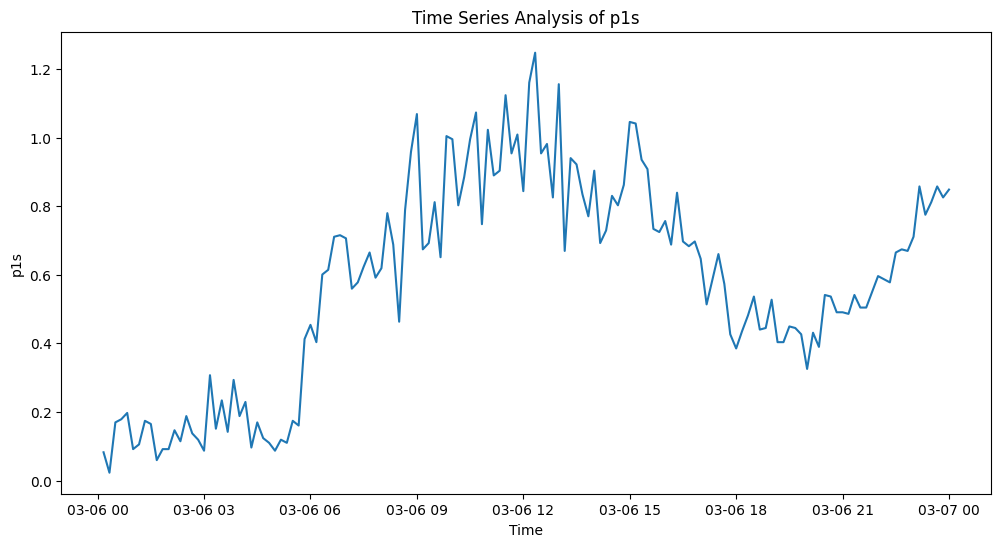

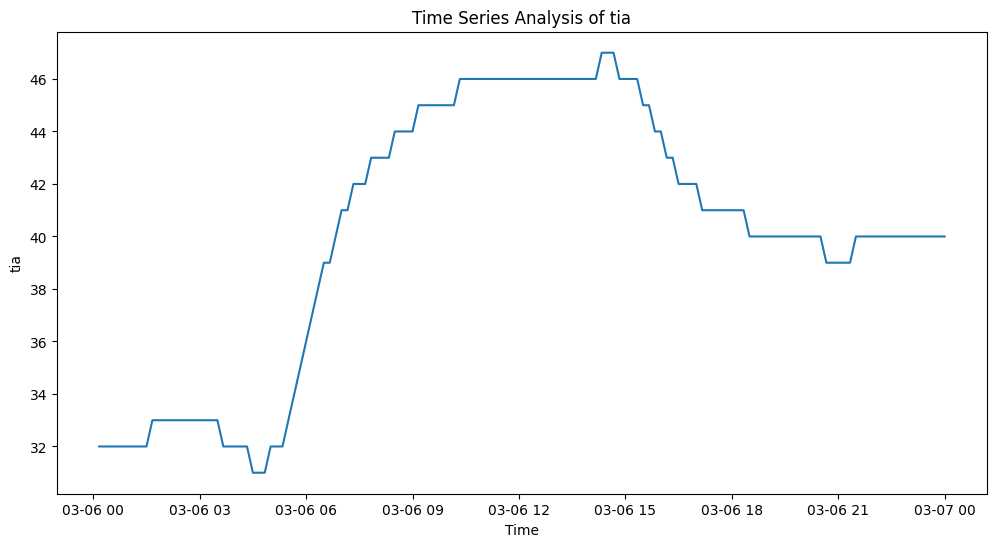

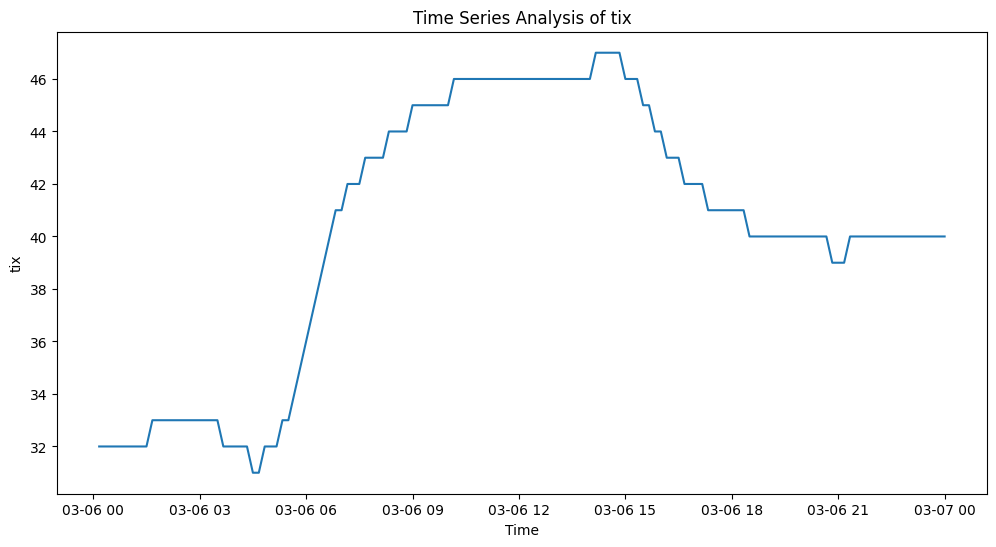

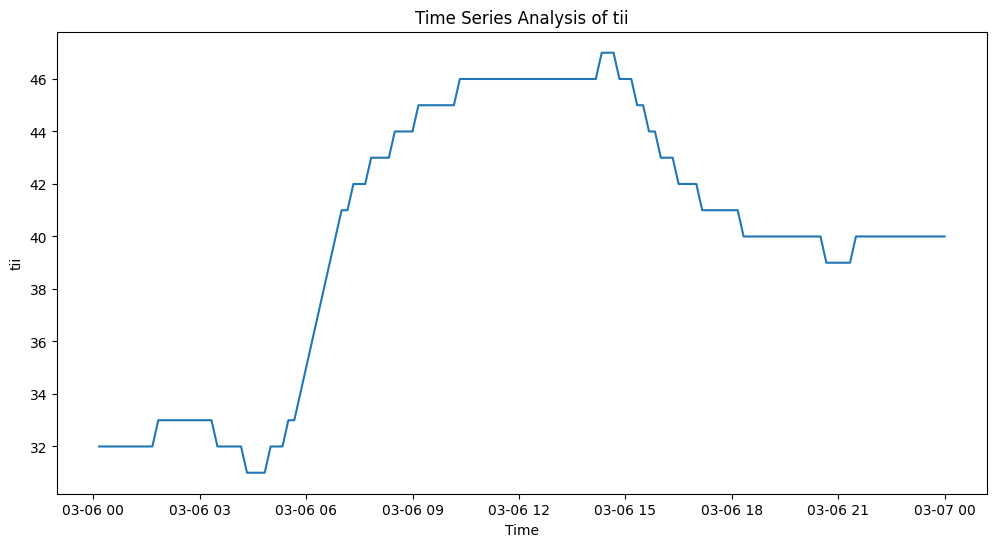

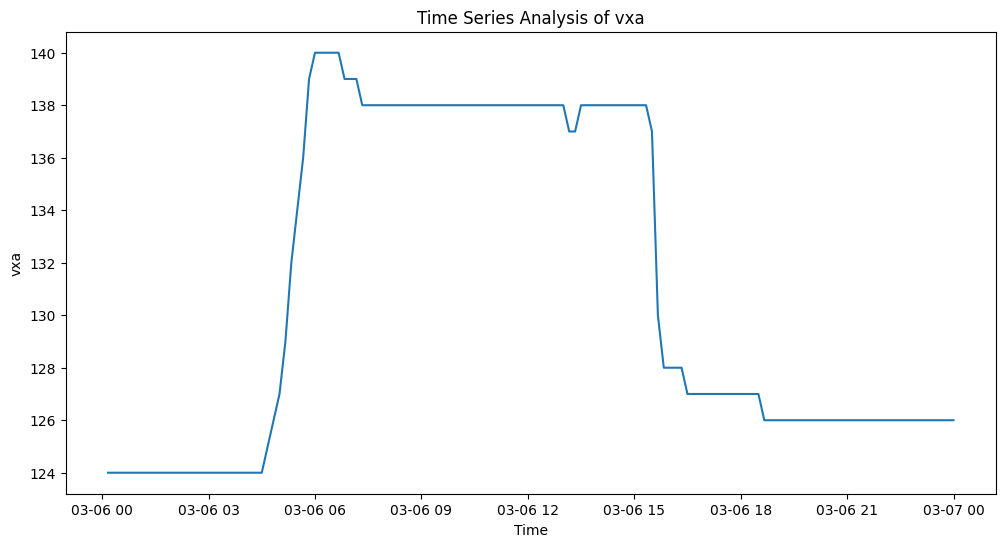

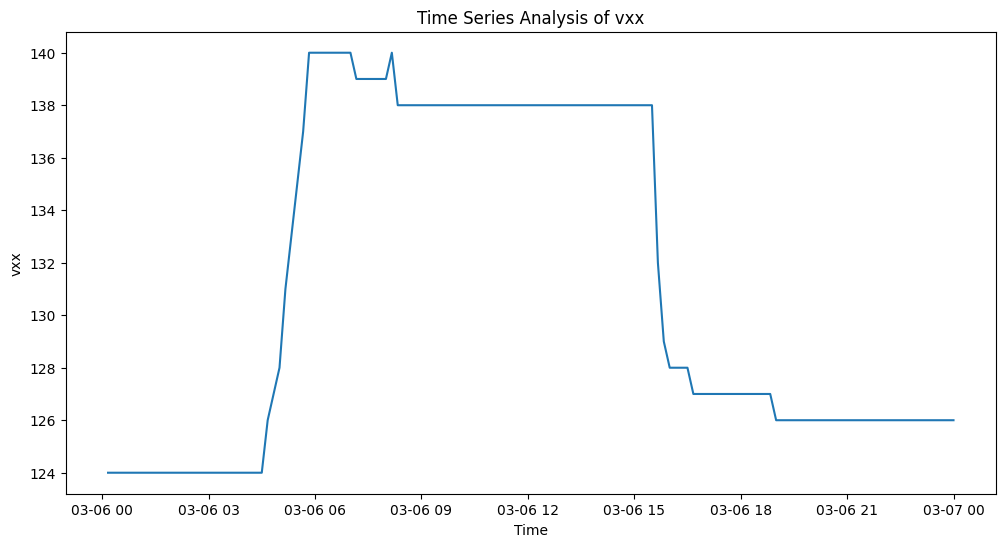

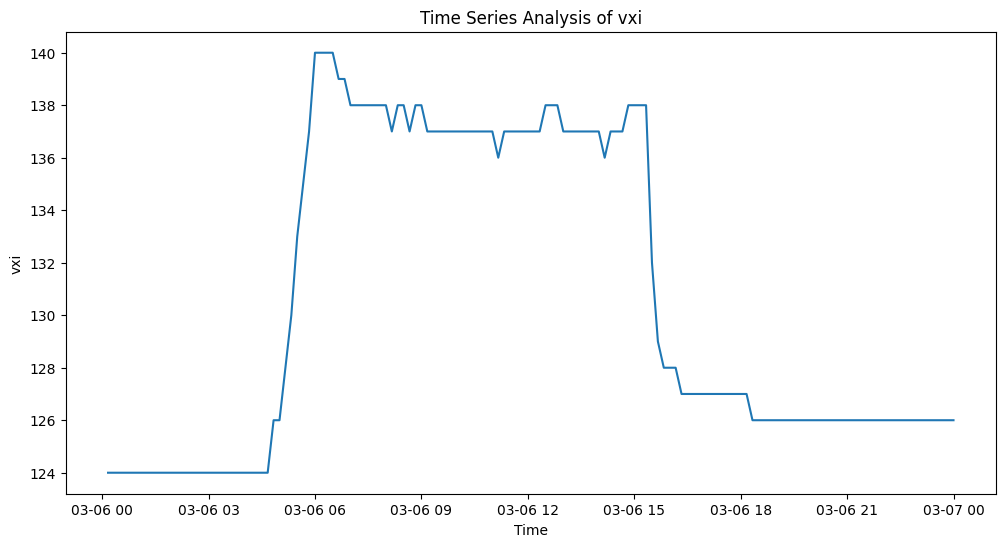

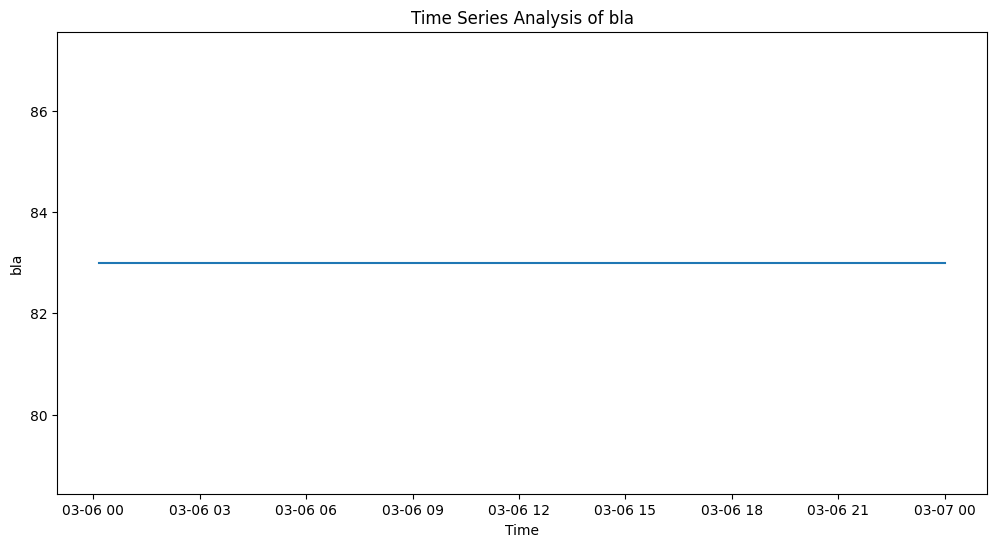

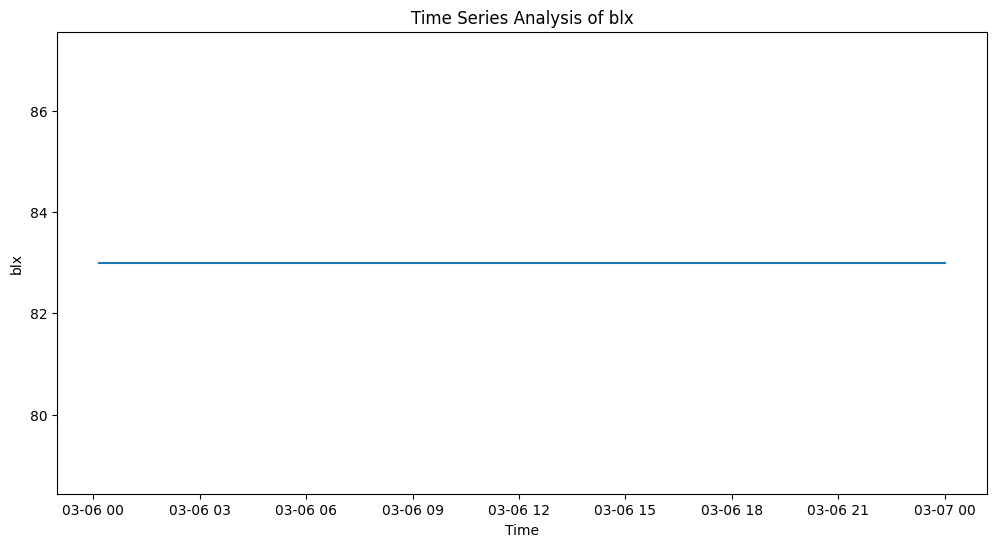

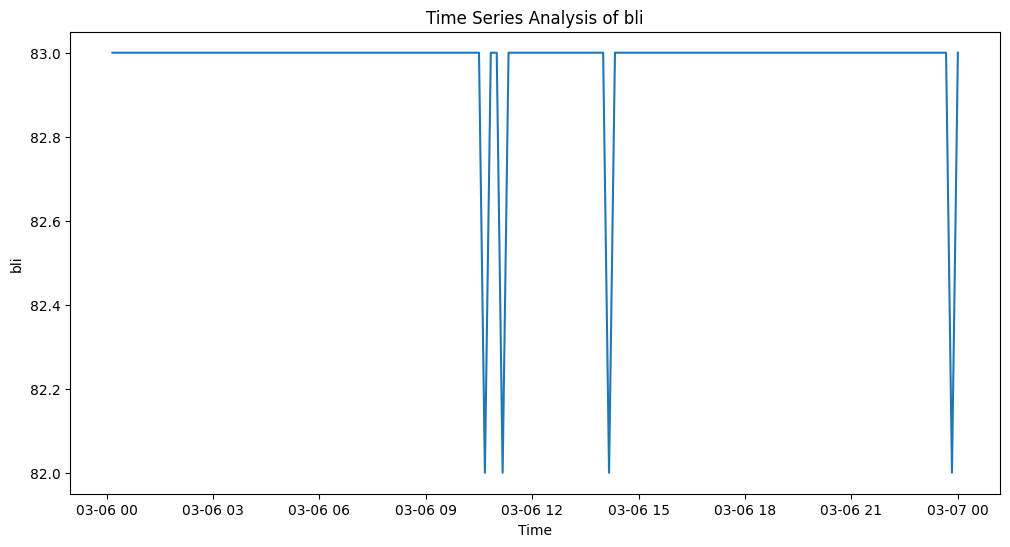

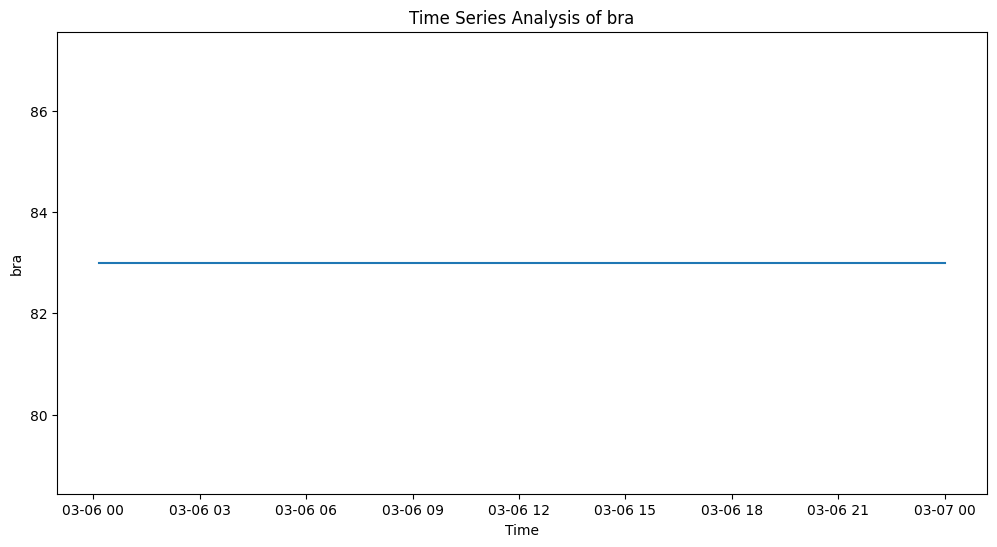

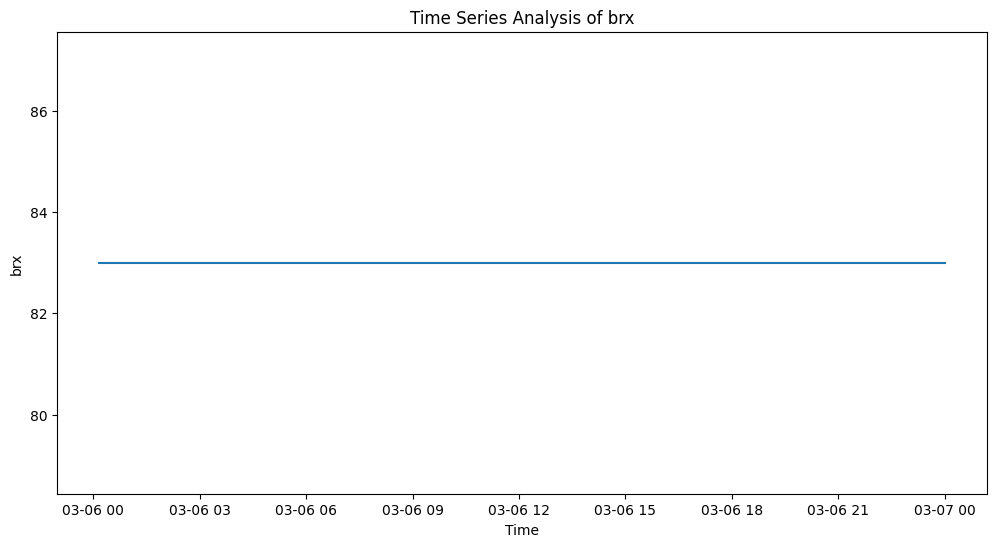

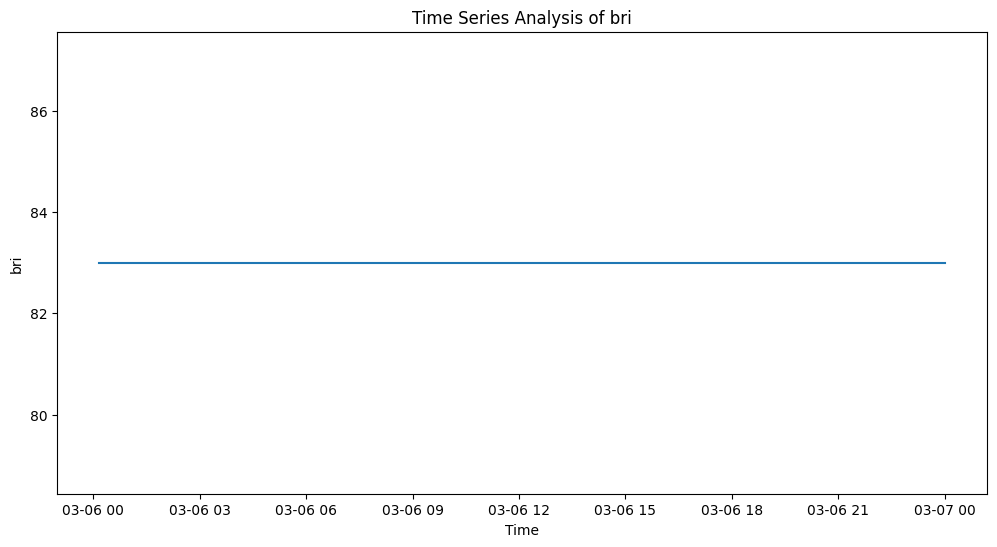

In [13]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [14]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

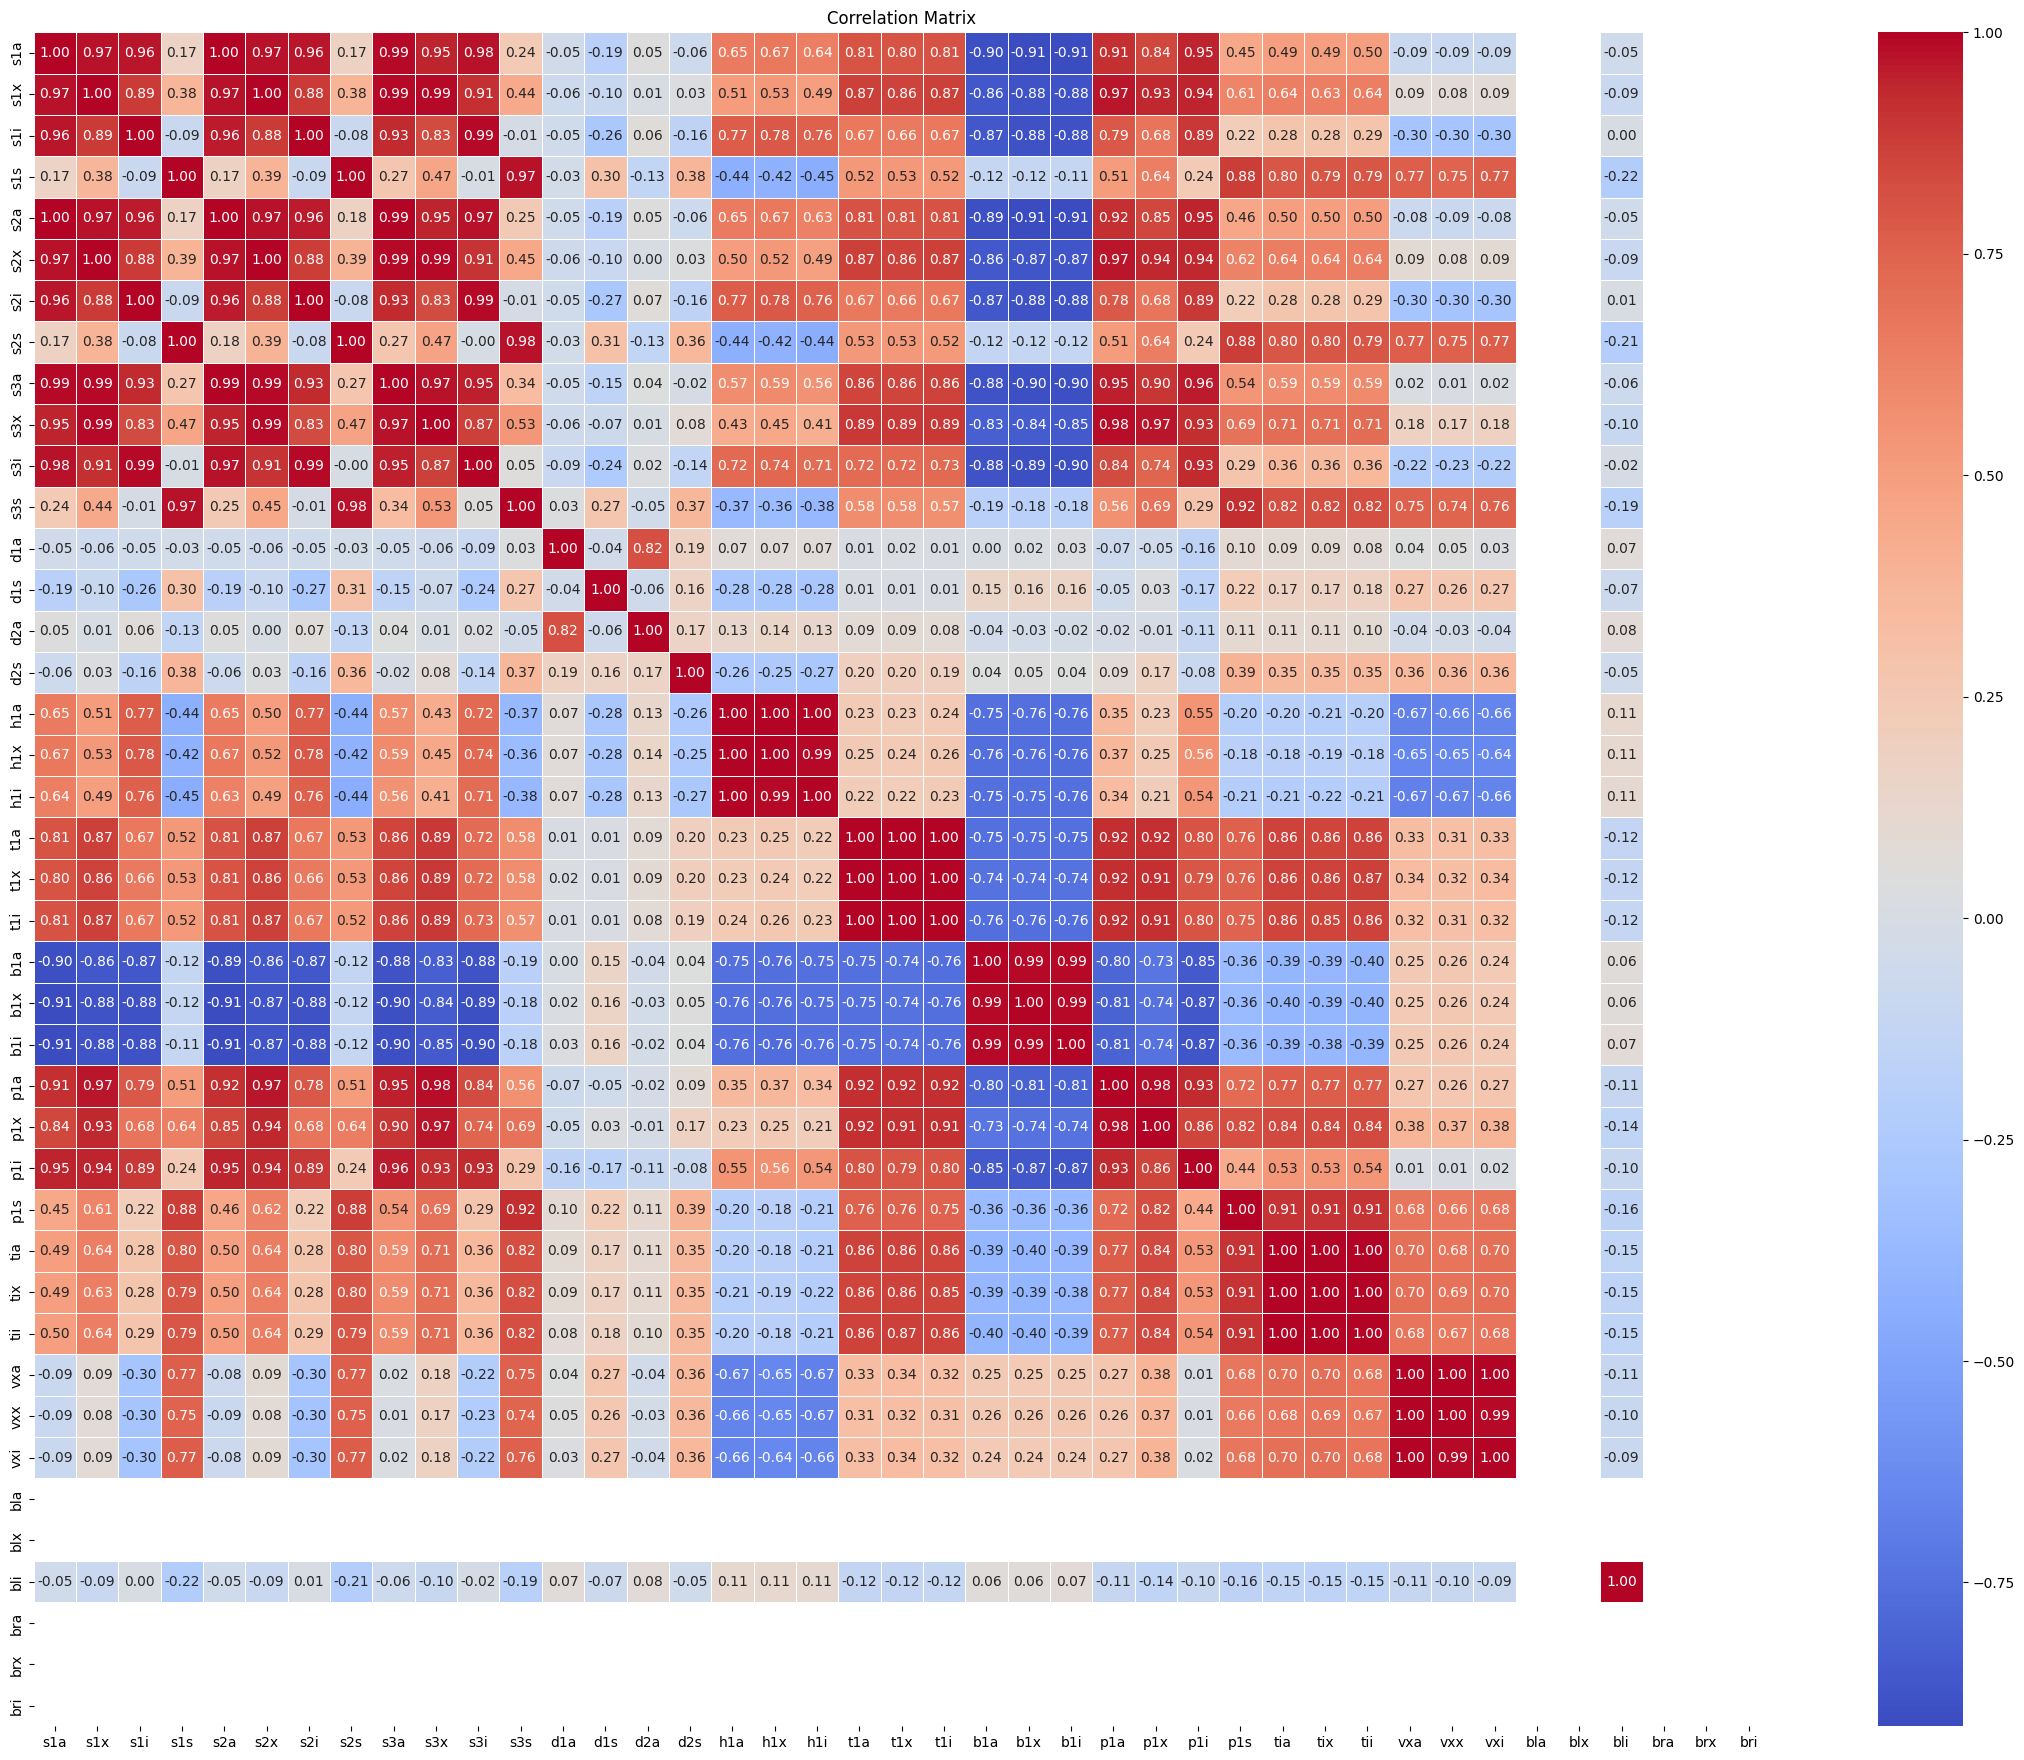

In [15]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

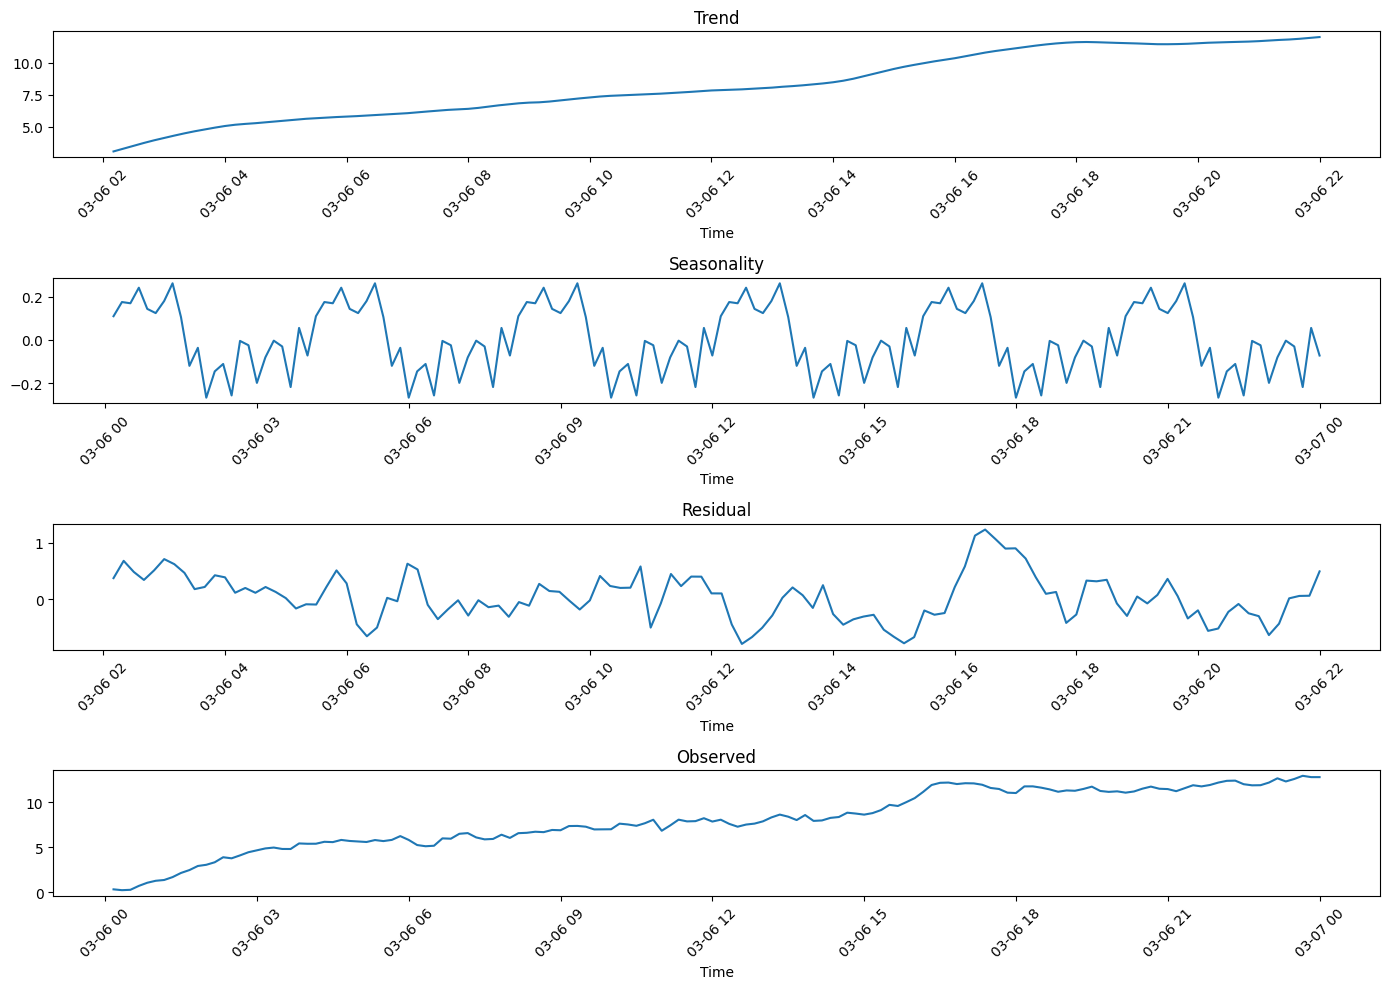

In [16]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA para

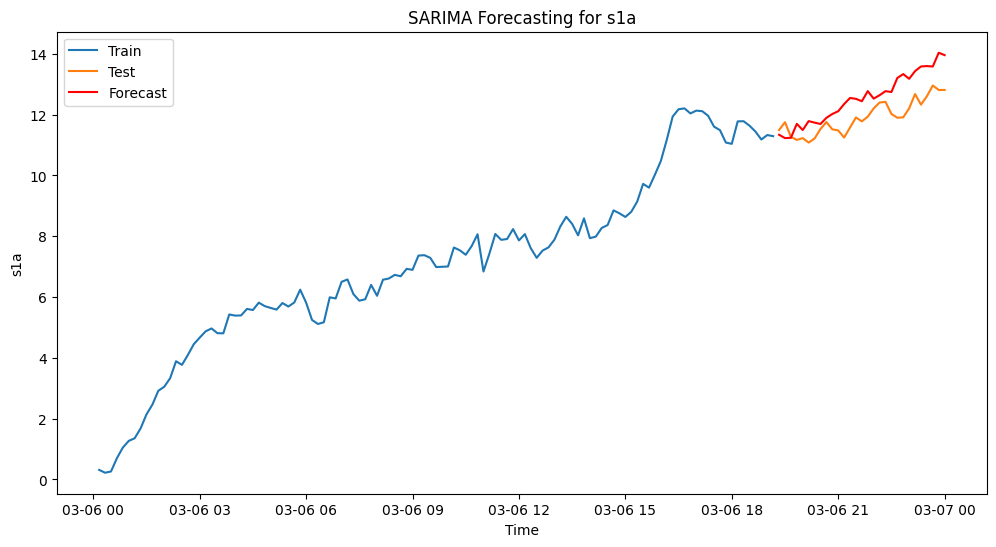

In [17]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()